<hr class="solid">

# 1. Food Preference
<a id="1"></a> 


**Main goal:** Divide customers taking into consideration their product usage – which type of dishes they order more often.

- MntMeat&Fish
- MntEntries
- MntVegan&Vegetarian
- MntDrinks
- MntDesserts
- MntAdditionalRequests

<hr class="solid">

In [1]:
## Importing what we need (some of it)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import KNNImputer


## Import data files
sales = pd.read_csv('https://raw.githubusercontent.com/EFSA-Jedi-Group/Data-Science-and-ML/main/Data/sales.csv')

In [2]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7008 entries, 0 to 7007
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   CustomerID             7008 non-null   int64  
 1   Date_Adherence         7008 non-null   object 
 2   Recency                6985 non-null   float64
 3   MntMeat&Fish           7008 non-null   float64
 4   MntEntries             7008 non-null   int64  
 5   MntVegan&Vegetarian    7008 non-null   float64
 6   MntDrinks              6980 non-null   float64
 7   MntDesserts            7008 non-null   float64
 8   MntAdditionalRequests  7008 non-null   float64
 9   NumOfferPurchases      7008 non-null   int64  
 10  NumAppPurchases        7008 non-null   int64  
 11  NumTakeAwayPurchases   7008 non-null   int64  
 12  NumStorePurchases      7008 non-null   int64  
 13  NumAppVisitsMonth      7008 non-null   int64  
 14  Complain               7008 non-null   int64  
dtypes: f

#### Lets first take out our duplicate values

In [3]:
sales.drop(sales[sales.duplicated()].index, inplace = True)
sales.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7000 entries, 0 to 7007
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   CustomerID             7000 non-null   int64  
 1   Date_Adherence         7000 non-null   object 
 2   Recency                6977 non-null   float64
 3   MntMeat&Fish           7000 non-null   float64
 4   MntEntries             7000 non-null   int64  
 5   MntVegan&Vegetarian    7000 non-null   float64
 6   MntDrinks              6972 non-null   float64
 7   MntDesserts            7000 non-null   float64
 8   MntAdditionalRequests  7000 non-null   float64
 9   NumOfferPurchases      7000 non-null   int64  
 10  NumAppPurchases        7000 non-null   int64  
 11  NumTakeAwayPurchases   7000 non-null   int64  
 12  NumStorePurchases      7000 non-null   int64  
 13  NumAppVisitsMonth      7000 non-null   int64  
 14  Complain               7000 non-null   int64  
dtypes: f

#### We have now just to solve our Drinks Missing values, we won't be taking into account Recency for this analysis ####
So for this we will check correlation and apply a KNN Since the Values are not 0 (because we have value 0s) and this isnt survey/sensitive based information where bias can apply, we can apply a KNN###

Text(0.5, 1.0, 'Correlation Matrix of Numeric Sales Data')

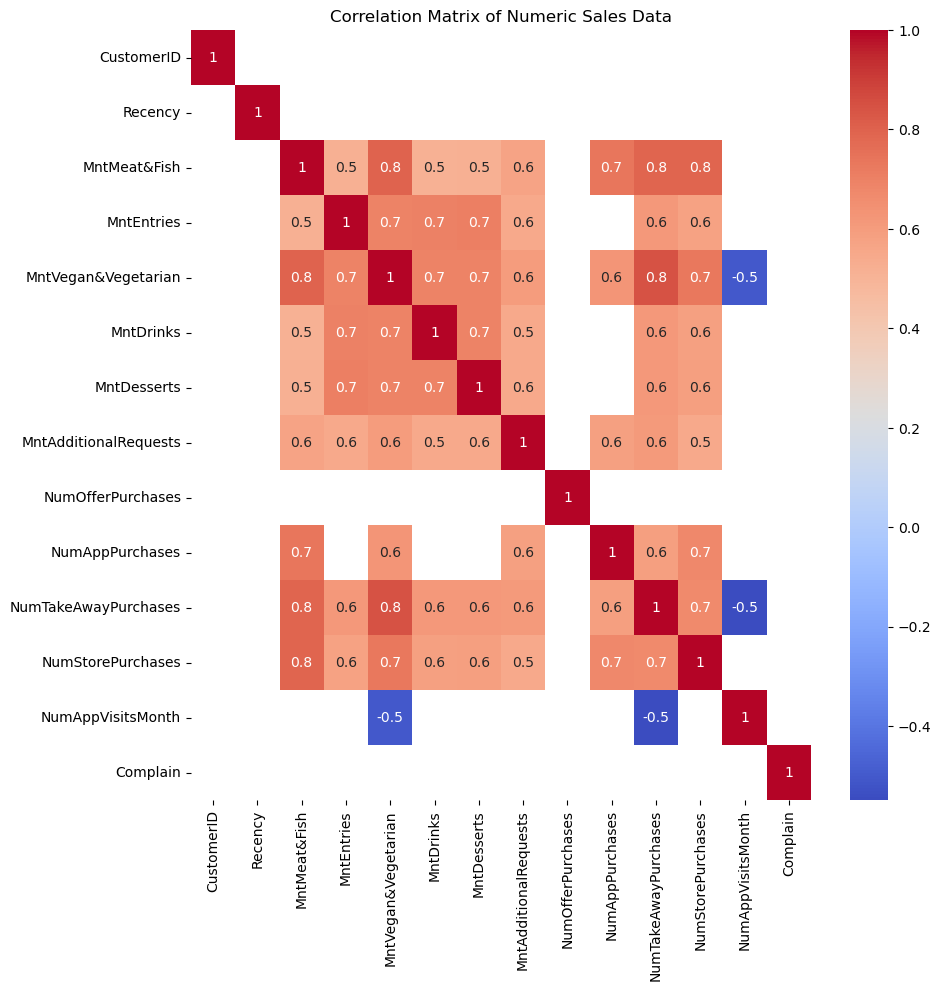

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

numeric_cols = sales.select_dtypes(include=np.number).columns.tolist()
sales_corr = sales[numeric_cols].corr(method='spearman')[(sales[numeric_cols].corr(method='spearman') > 0.5) | (sales[numeric_cols].corr(method='spearman') < -0.5)]

plt.figure(figsize=(10,10))
ax = sns.heatmap(sales_corr, annot=True, fmt='.1g', cmap='coolwarm', cbar=True)
ax.set_title('Correlation Matrix of Numeric Sales Data')

We have high correlation between Drinks,Entries, Vegetarian and Dessertts (0.7).

In [5]:
foods = sales[['MntMeat&Fish', 'MntDrinks', 'MntEntries', 'MntVegan&Vegetarian', 'MntDesserts', 'MntAdditionalRequests']]

### Filling Missing Values
Here we apply KNN without previously scaling our data, since its the same measurement unit, and it seems the missing values are at random

In [6]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
X = foods

# Define the parameter grid to search over
param_grid = {'n_neighbors': [1, 3, 5, 7, 9]}

# Define the imputer model
imputer = KNNImputer()

# Define the grid search object with 5-fold cross-validation
grid_search = GridSearchCV(imputer, param_grid, cv=5, scoring='neg_mean_squared_error')

# Fit the grid search object to the data
grid_search.fit(X)
grid_search
print("Best parameters: ", grid_search.best_params_)
print("Best negative mean squared error: ", grid_search.best_score_)

Best parameters:  {'n_neighbors': 1}
Best negative mean squared error:  nan


C:\Users\gonca\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\gonca\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 765, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'

  warnings.warn(
C:\Users\gonca\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\gonca\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 765, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'

  warnings.warn(
C:\Users\gonca\anaconda3\lib\site-pack

We see it is 1 so lets use it

In [7]:
## lets get the knn values
foods_knn = foods[['MntDrinks','MntEntries','MntVegan&Vegetarian','MntDesserts']]

imputer = KNNImputer(n_neighbors=1)
array_impute = imputer.fit_transform(foods_knn) # this is an array
foods_knn = pd.DataFrame(array_impute, columns = foods_knn.columns)
foods_knn.info()
foods.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7000 entries, 0 to 6999
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   MntDrinks            7000 non-null   float64
 1   MntEntries           7000 non-null   float64
 2   MntVegan&Vegetarian  7000 non-null   float64
 3   MntDesserts          7000 non-null   float64
dtypes: float64(4)
memory usage: 218.9 KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 7000 entries, 0 to 7007
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   MntMeat&Fish           7000 non-null   float64
 1   MntDrinks              6972 non-null   float64
 2   MntEntries             7000 non-null   int64  
 3   MntVegan&Vegetarian    7000 non-null   float64
 4   MntDesserts            7000 non-null   float64
 5   MntAdditionalRequests  7000 non-null   float64
dtypes: float64(5), int64(1)
m

In [8]:
food_set = foods.copy()

In [9]:
foods.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7000 entries, 0 to 7007
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   MntMeat&Fish           7000 non-null   float64
 1   MntDrinks              6972 non-null   float64
 2   MntEntries             7000 non-null   int64  
 3   MntVegan&Vegetarian    7000 non-null   float64
 4   MntDesserts            7000 non-null   float64
 5   MntAdditionalRequests  7000 non-null   float64
dtypes: float64(5), int64(1)
memory usage: 382.8 KB


In [10]:
food_set['MntDrinks'] = foods_knn['MntDrinks'].values
food_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7000 entries, 0 to 7007
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   MntMeat&Fish           7000 non-null   float64
 1   MntDrinks              7000 non-null   float64
 2   MntEntries             7000 non-null   int64  
 3   MntVegan&Vegetarian    7000 non-null   float64
 4   MntDesserts            7000 non-null   float64
 5   MntAdditionalRequests  7000 non-null   float64
dtypes: float64(5), int64(1)
memory usage: 382.8 KB


In [11]:
food_set.kurt()

MntMeat&Fish             0.532098
MntDrinks                3.832031
MntEntries               4.096167
MntVegan&Vegetarian      8.431538
MntDesserts              3.813464
MntAdditionalRequests    3.084190
dtype: float64

Not looking good, high kurtosis for some variables, specially Vegans. Besides this set lets create one with the percetanges of each category of food, by Total Spent (MntTotal)

In [12]:
foods_perc = food_set.copy()
foods_perc['MntTotal'] = foods[['MntMeat&Fish', 'MntEntries', 'MntVegan&Vegetarian', 'MntDrinks', 'MntDesserts','MntAdditionalRequests']].sum(axis=1)
Mnt_Total = foods_perc['MntTotal']
foods_perc = foods_perc.div(Mnt_Total, axis=0)
foods_perc.drop('MntTotal', axis=1, inplace=True)
foods_perc

MntMeat&Fish  MntDrinks  MntEntries  MntVegan&Vegetarian  MntDesserts  \
0         0.265805   0.143678    0.071839             0.474138     0.043103   
1         0.436467   0.063017    0.015496             0.452479     0.030992   
2         0.206795   0.000000    0.236337             0.221566     0.295421   
3         0.455753   0.090808    0.150775             0.215883     0.075388   
4         0.459086   0.061576    0.076628             0.326355     0.061576   
...            ...        ...         ...                  ...          ...   
7003      0.551431   0.047084    0.079681             0.255342     0.063383   
7004      0.290160   0.014017    0.155593             0.381623     0.155593   
7005      0.489861   0.079958    0.031790             0.301286     0.096334   
7006      0.401117   0.191348    0.000000             0.379724     0.024364   
7007      0.434899   0.144966    0.028993             0.366443     0.017450   

      MntAdditionalRequests  
0                  0.001437  
1                  0.001550  
2                  0.039882  
3                  0.011394  
4                  0.014778  
...                     ...  
7003               0.003079  
7004               0.003014  
7005               0.000771  
7006               0.003447  
7007               0.007248  

[7000 rows x 6 columns]

In [13]:
foods_perc.kurt()

MntMeat&Fish            -0.792750
MntDrinks                4.701864
MntEntries               4.469401
MntVegan&Vegetarian      2.113849
MntDesserts              4.882633
MntAdditionalRequests    2.515234
dtype: float64

Looking a lot better. Lets now evaluate our clusetering needs first with PCA

## Exploratory Analysis

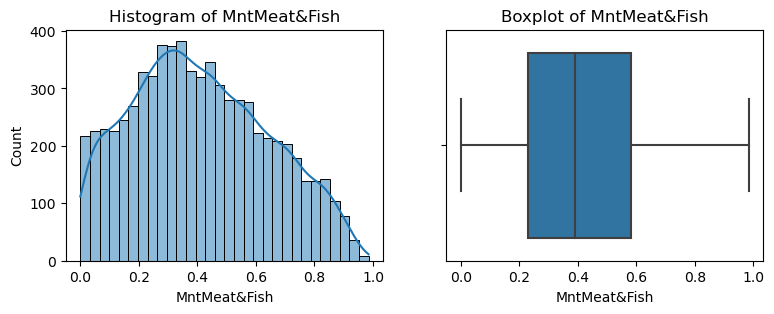

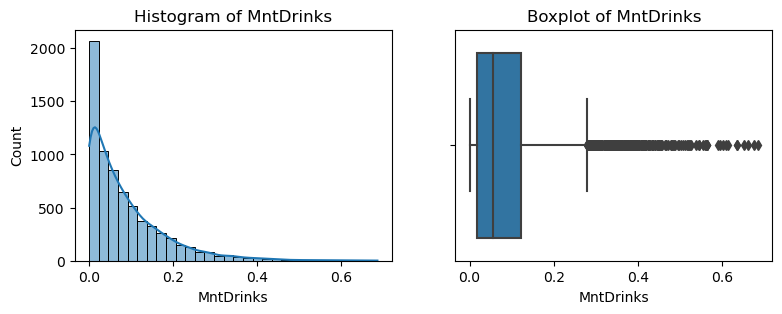

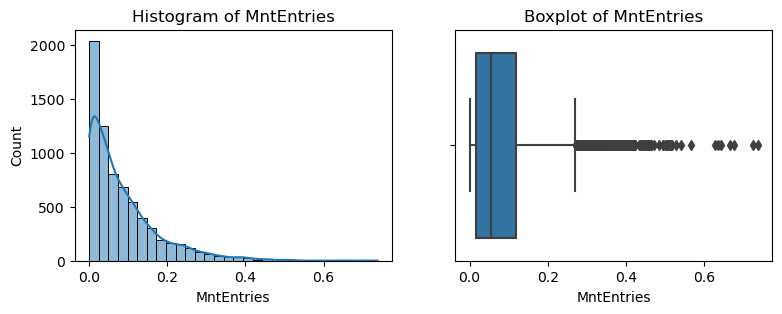

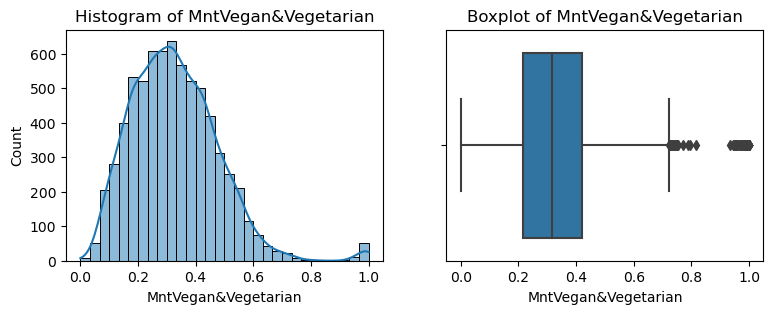

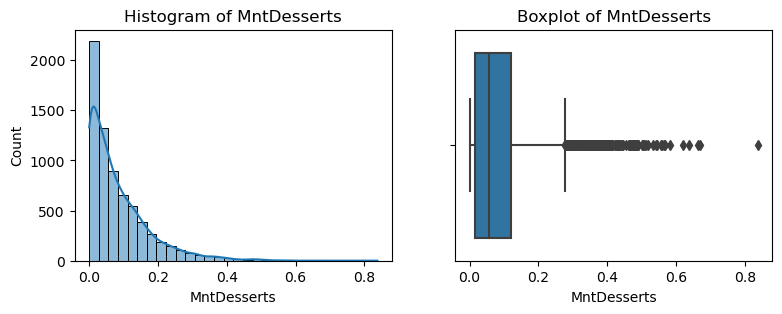

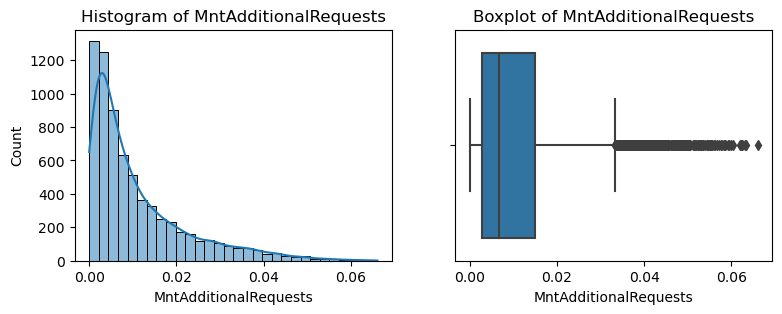

In [14]:
for i in foods_perc:
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(9, 3))
    sns.histplot(ax=ax1, x=foods_perc[i], bins=30,kde= True)
    sns.boxplot(ax=ax2, x=foods_perc[i])
    ax1.set_title(f"Histogram of {i}")
    ax2.set_title(f"Boxplot of {i}")
    plt.show()

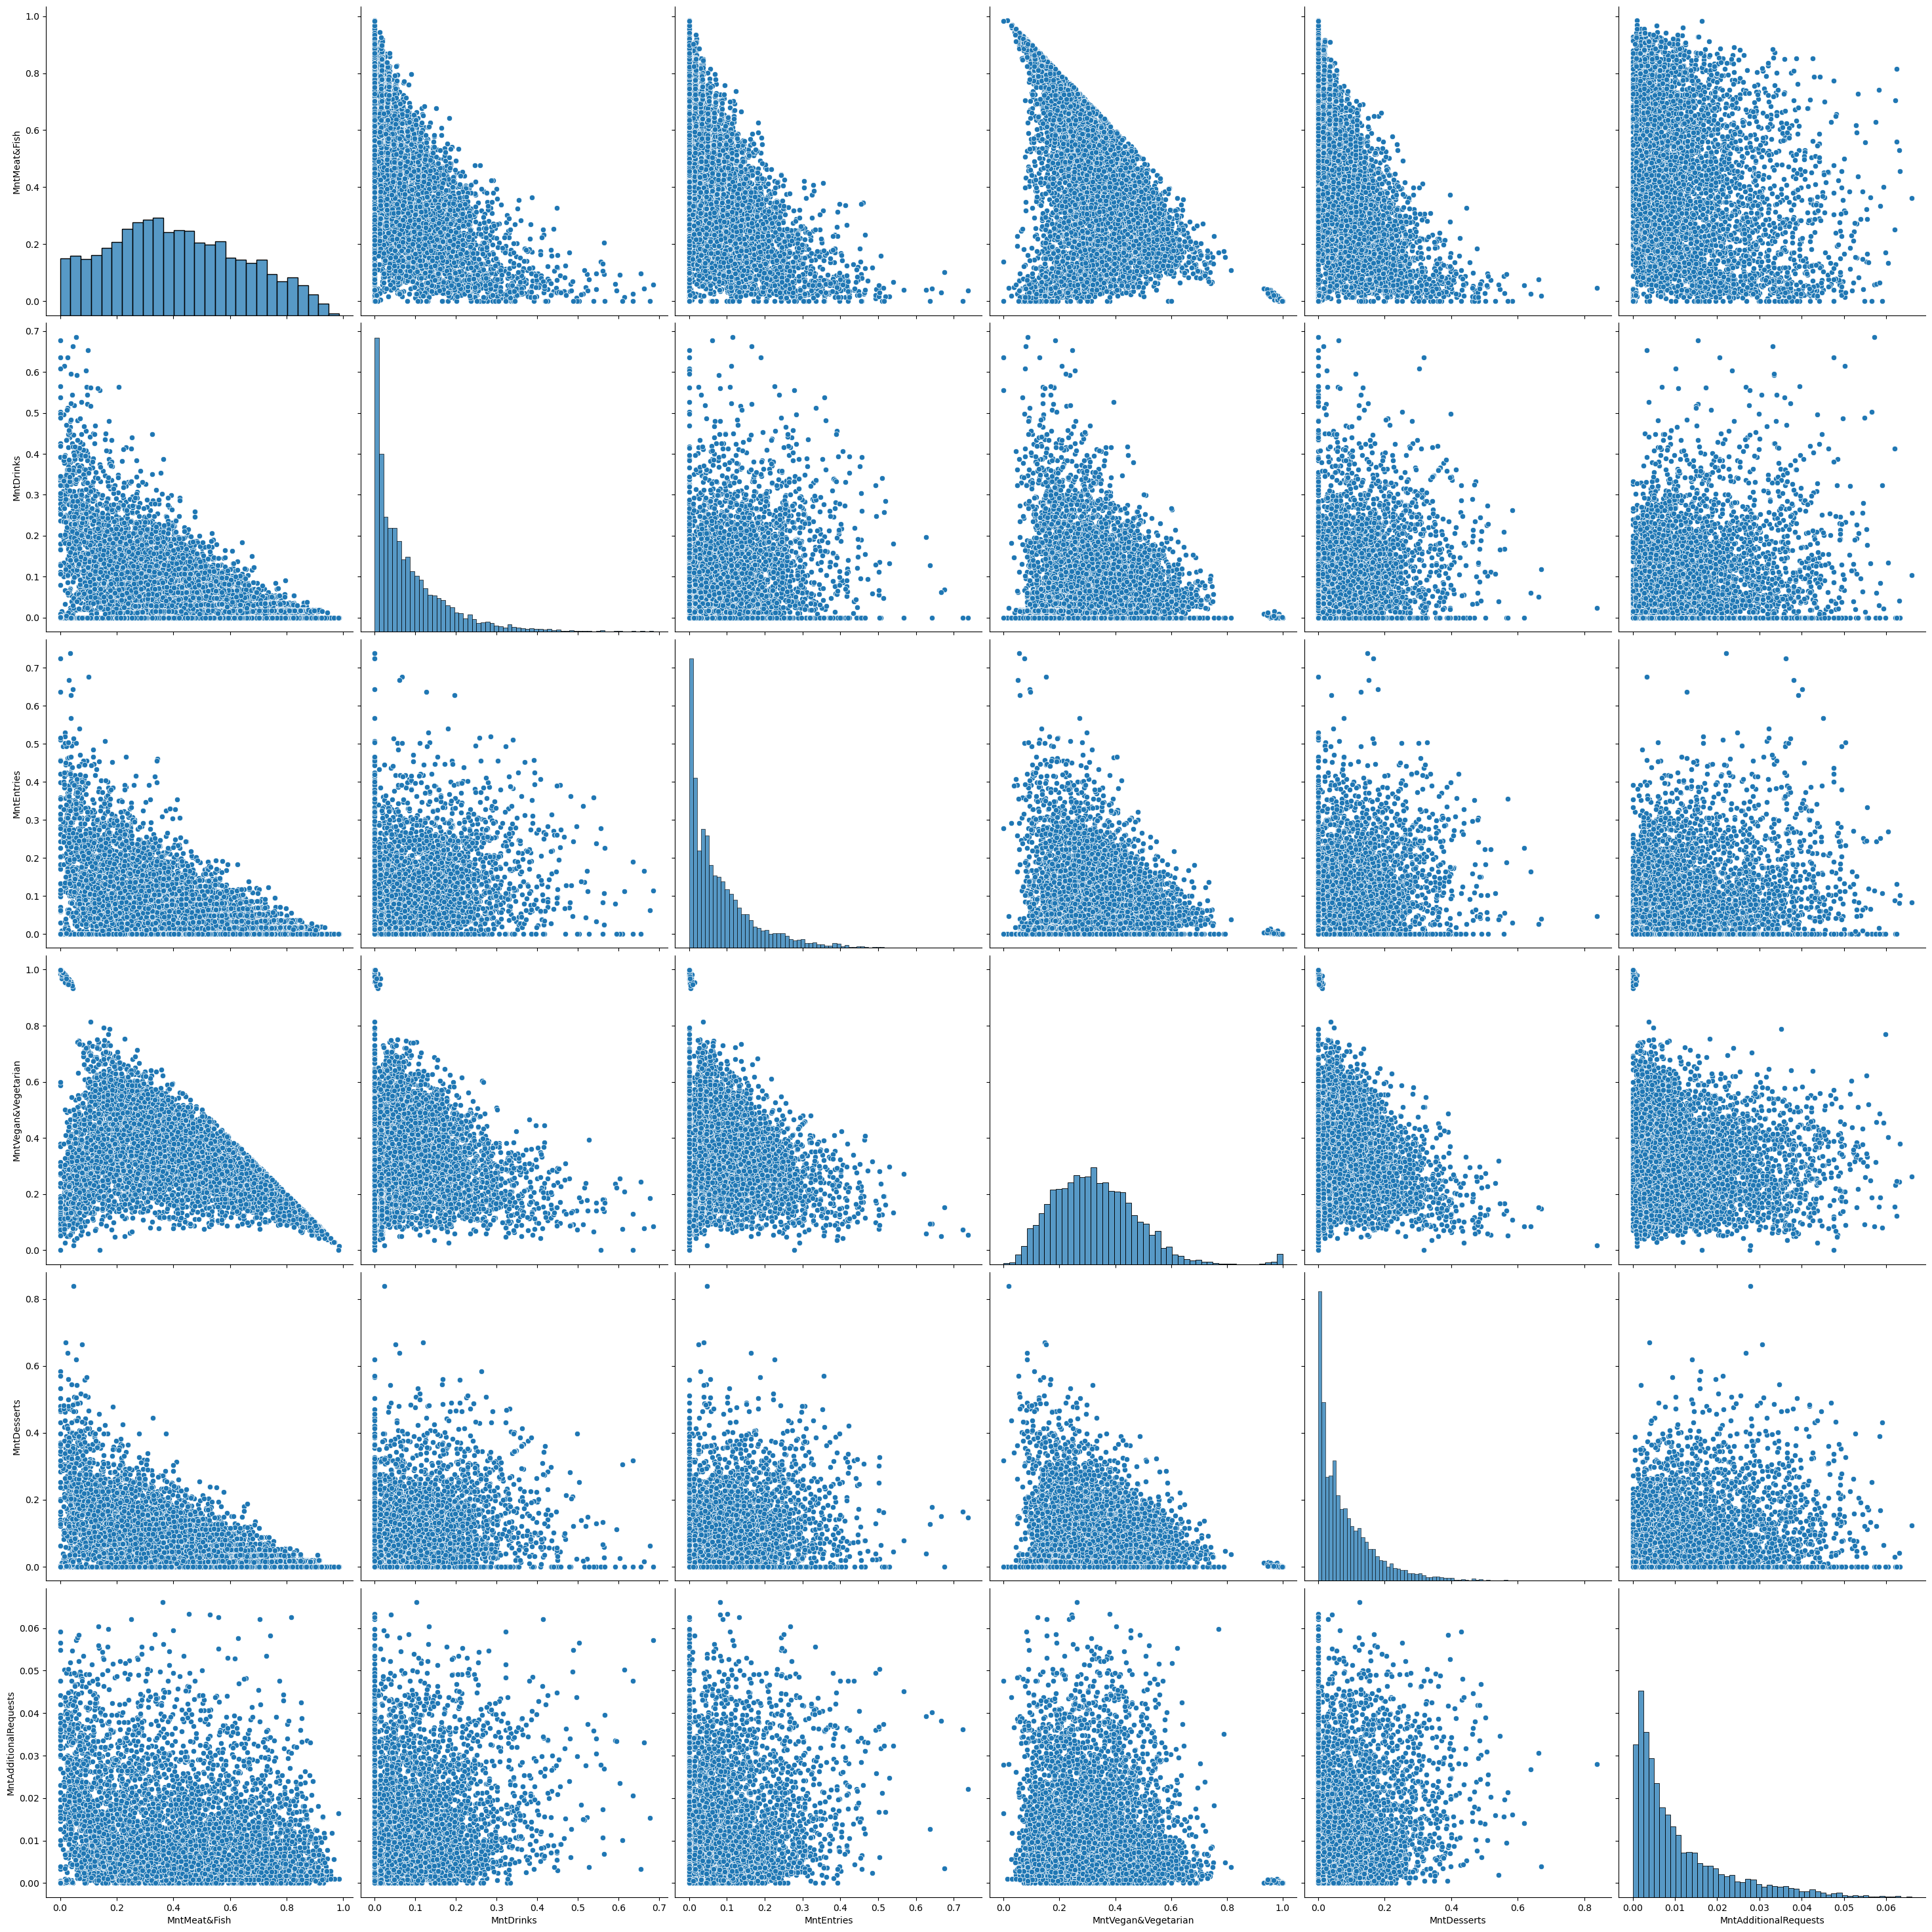

In [15]:
sns.pairplot(foods_perc, height=5)

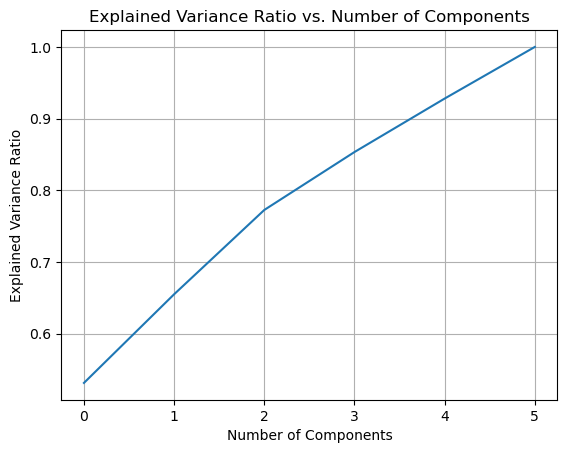

In [16]:
## No Scaling Dataset
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


scaler = StandardScaler()
foods_scaled_1 = scaler.fit_transform(food_set)

# Perform PCA
pca = PCA().fit(foods_scaled_1)

# Plot the explained variance ratio
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio vs. Number of Components')
plt.grid(True)
plt.show()

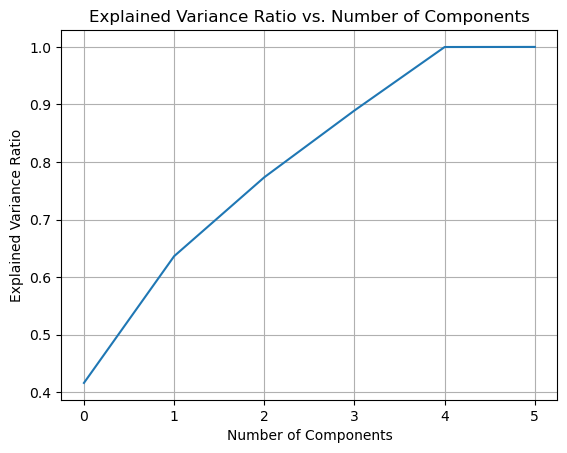

In [17]:
foods_scaled_2 = scaler.fit_transform(foods_perc)

# Perform PCA
pca = PCA().fit(foods_scaled_2)

# Plot the explained variance ratio
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio vs. Number of Components')
plt.grid(True)
plt.show()

We see that the 2 clusters are accountable for at least .75 of variance, so lets use that

###### A function that gives scores for clusters 

In [88]:
from sklearn.metrics import silhouette_score
from sklearn.metrics import silhouette_score, calinski_harabasz_score
from sklearn.metrics import davies_bouldin_score
def cluster_scores(data, labels, model):
    # Silhouette Score
    silhouette = '{:.4f}'.format(silhouette_score(data, labels))
    
    # Calinski-Harabasz Index
    calinski = '{:.4f}'.format(calinski_harabasz_score(data, labels))
    
    # Within Cluster Sum of Squares (WCSS)
    if hasattr(model, 'inertia_'):
        wcss = '{:.4f}'.format(np.sum(model.inertia_))
    else:
        wcss = 'N/A'
    
    # Davies-Bouldin Index
    db = '{:.4f}'.format(davies_bouldin_score(data, labels))
    
    scores_table = pd.DataFrame({'Silhouette Score': silhouette,
                                 'Calinski-Harabasz Index': calinski,
                                 'WCSS': wcss,
                                 'Davies-Bouldin Index': db}, index=[0]).T
    scores_table.columns = ['Score']
    
    return scores_table

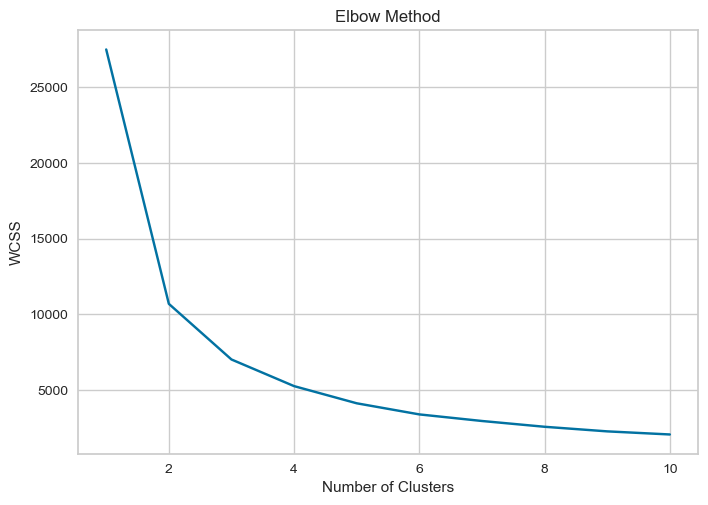

C:\Users\gonca\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


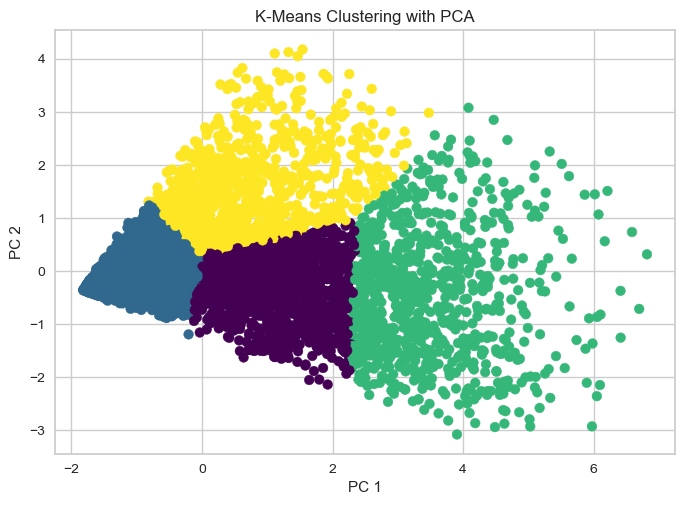

Score
Silhouette Score            0.5550
Calinski-Harabasz Index  9851.6767
WCSS                     5265.1729
Davies-Bouldin Index        0.8511

In [89]:
## For the not scaled
foods_scaled_3 = scaler.fit_transform(food_set)

pca = PCA(n_components=2)
foods_pca = pca.fit_transform(foods_scaled_3)
foods_pca_test = foods_pca.copy()
# Step 2: Determine the optimal number of clusters using the elbow method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(foods_pca)
    wcss.append(kmeans.inertia_)

# Plot the elbow curve
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

# Step 3: Apply K-Means clustering with the optimal number of clusters (e.g. 3)
kmeans = KMeans(n_clusters=4, init='k-means++', max_iter=3000, random_state=0)
kmeans.fit(foods_pca)

# Step 4: Plot the results
plt.scatter(foods_pca[:,0], foods_pca[:,1], c=kmeans.labels_, cmap='viridis')
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.title('K-Means Clustering with PCA')
plt.show()

cluster_scores(foods_pca_test,kmeans.labels_,kmeans)

In [66]:
food_set_labeled = food_set.copy()
food_set_labeled['cluster'] = kmeans.labels_
food_set_labeled


MntMeat&Fish  MntDrinks  MntEntries  MntVegan&Vegetarian  MntDesserts  \
0           5180.0     2800.0        1400               9240.0        840.0   
1           8450.0     1220.0         300               8760.0        600.0   
2            140.0        0.0         160                150.0        200.0   
3           5320.0     1060.0        1760               2520.0        880.0   
4           6710.0      900.0        1120               4770.0        900.0   
...            ...        ...         ...                  ...          ...   
7003        6090.0      520.0         880               2820.0        700.0   
7004        4140.0      200.0        2220               5445.0       2220.0   
7005       10170.0     1660.0         660               6255.0       2000.0   
7006        6750.0     3220.0           0               6390.0        410.0   
7007        6480.0     2160.0         432               5460.0        260.0   

      MntAdditionalRequests  cluster  
0                      28.0        2  
1                      30.0        0  
2                      27.0        1  
3                     133.0        3  
4                     216.0        3  
...                     ...      ...  
7003                   34.0        0  
7004                   43.0        0  
7005                   16.0        2  
7006                   58.0        0  
7007                  108.0        3  

[7000 rows x 7 columns]

In [67]:
check_veg_1 = food_set_labeled.groupby(['cluster']).mean()
check_veg_1

MntMeat&Fish    MntDrinks   MntEntries  MntVegan&Vegetarian  \
cluster                                                                
0         4732.023112   978.421053   934.840580          5952.621281   
1         1028.375526   120.643657   119.668207           558.489985   
2         6492.600000  1912.425287  1887.597701          7878.752874   
3         6162.084324   442.743784   442.672432          2878.047568   

         MntDesserts  MntAdditionalRequests  
cluster                                      
0         929.412662              40.518459  
1         121.136672              16.685568  
2        1931.022989              88.670115  
3         448.038919             110.980541

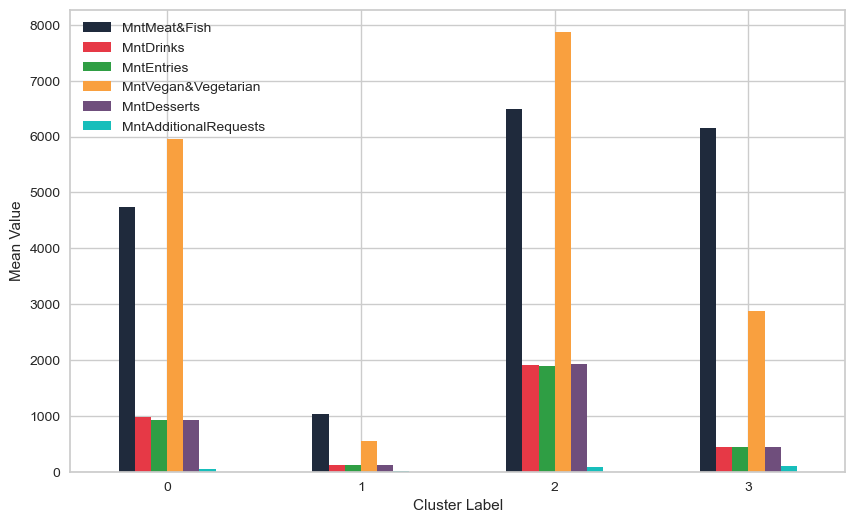

In [62]:
colors =  ['#1F2A3C', '#E63946', '#2F9E44', '#F9A03F', '#6F4E7C', '#17BEBB']
ax_veg_1 = check_veg_1.plot.bar(figsize=(10,6), rot=0, color = colors)
ax_veg_1.set_xlabel('Cluster Label')
ax_veg_1.set_ylabel('Mean Value')
plt.show()

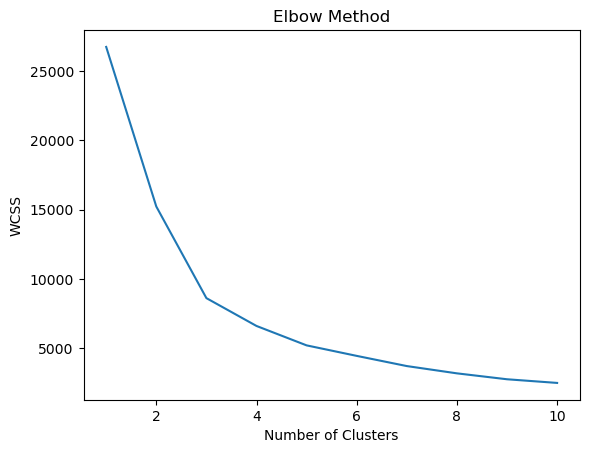

C:\Users\gonca\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


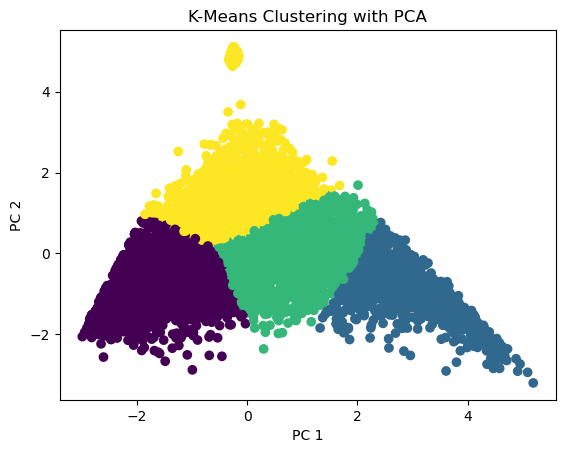

Score
Silhouette Score            0.4028
Calinski-Harabasz Index  7099.7851
WCSS                     6609.1781
Davies-Bouldin Index        0.8613

In [21]:
foods_scaled_4 = scaler.fit_transform(foods_perc)

pca = PCA(n_components=2)
foods_pca = pca.fit_transform(foods_scaled_4)
foods_pca_test_2 = foods_pca.copy()

# Step 2: Determine the optimal number of clusters using the elbow method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(foods_pca)
    wcss.append(kmeans.inertia_)

# Plot the elbow curve
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

# Step 3: Apply K-Means clustering with the optimal number of clusters (e.g. 3)
kmeans = KMeans(n_clusters=4, init='k-means++', max_iter=3000, random_state=0)
kmeans.fit(foods_pca)

# Step 4: Plot the results
plt.scatter(foods_pca[:,0], foods_pca[:,1], c=kmeans.labels_, cmap='viridis')
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.title('K-Means Clustering with PCA')
plt.show()


cluster_scores(foods_pca_test_2,kmeans.labels_,kmeans)

We see that there is that blob there... its likely to be result of our Vegans, lets take care of that and check back.

In [22]:
food_perc_labeled = foods_perc.copy()

In [23]:
food_perc_labeled['cluster'] = kmeans.labels_


In [24]:
food_perc_labeled

MntMeat&Fish  MntDrinks  MntEntries  MntVegan&Vegetarian  MntDesserts  \
0         0.265805   0.143678    0.071839             0.474138     0.043103   
1         0.436467   0.063017    0.015496             0.452479     0.030992   
2         0.206795   0.000000    0.236337             0.221566     0.295421   
3         0.455753   0.090808    0.150775             0.215883     0.075388   
4         0.459086   0.061576    0.076628             0.326355     0.061576   
...            ...        ...         ...                  ...          ...   
7003      0.551431   0.047084    0.079681             0.255342     0.063383   
7004      0.290160   0.014017    0.155593             0.381623     0.155593   
7005      0.489861   0.079958    0.031790             0.301286     0.096334   
7006      0.401117   0.191348    0.000000             0.379724     0.024364   
7007      0.434899   0.144966    0.028993             0.366443     0.017450   

      MntAdditionalRequests  cluster  
0                  0.001437        3  
1                  0.001550        3  
2                  0.039882        1  
3                  0.011394        2  
4                  0.014778        2  
...                     ...      ...  
7003               0.003079        0  
7004               0.003014        2  
7005               0.000771        0  
7006               0.003447        3  
7007               0.007248        3  

[7000 rows x 7 columns]

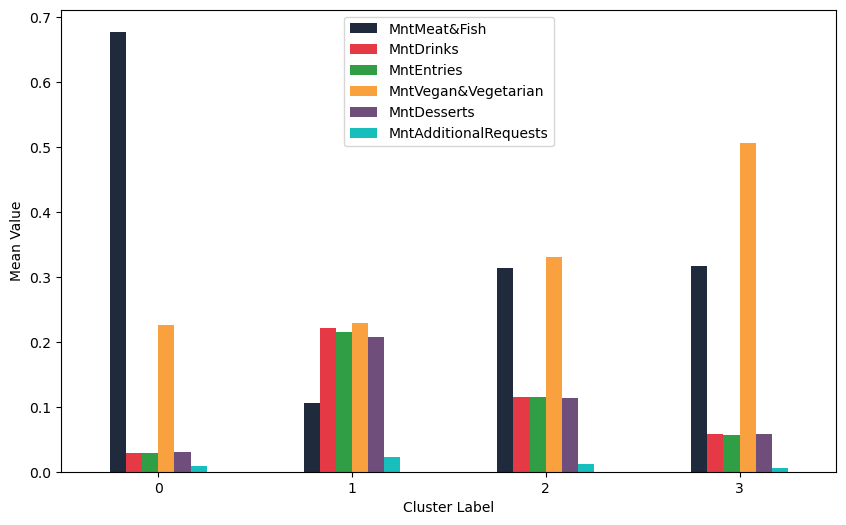

In [25]:
check_veg_2 = food_perc_labeled.groupby(['cluster']).mean()
check_veg_2

ax_veg_2 = check_veg_2.plot.bar(figsize=(10,6), rot=0, color = colors)
ax_veg_2.set_xlabel('Cluster Label')
ax_veg_2.set_ylabel('Mean Value')
plt.show()

In [26]:
## For the food_set
mask = food_set['MntVegan&Vegetarian'] < 20000
food_set_noveg = food_set[mask]

##For the food_perc
mask = foods_perc['MntVegan&Vegetarian'] < 0.9
food_perc_noveg = foods_perc[mask]


Lets Run them again

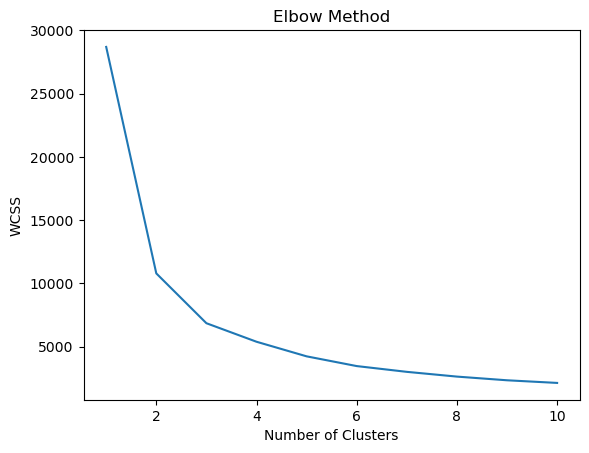

C:\Users\gonca\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


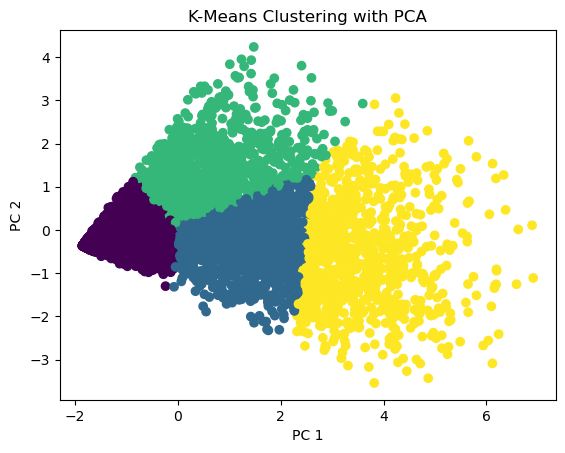

Score
Silhouette Score             0.5476
Calinski-Harabasz Index  10022.1147
WCSS                      5377.1010
Davies-Bouldin Index         0.8925

In [27]:
## For the not scaled
foods_scaled_5 = scaler.fit_transform(food_set_noveg)

pca = PCA(n_components=2)
foods_pca = pca.fit_transform(foods_scaled_5)
foods_pca_test_3 = foods_pca

# Step 2: Determine the optimal number of clusters using the elbow method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(foods_pca)
    wcss.append(kmeans.inertia_)

# Plot the elbow curve
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

# Step 3: Apply K-Means clustering with the optimal number of clusters (e.g. 3)
kmeans = KMeans(n_clusters=4, init='k-means++', max_iter=3000, random_state=0)
kmeans.fit(foods_pca)

# Step 4: Plot the results
plt.scatter(foods_pca[:,0], foods_pca[:,1], c=kmeans.labels_, cmap='viridis')
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.title('K-Means Clustering with PCA')
plt.show()

cluster_scores(foods_pca_test_3,kmeans.labels_,kmeans)

In [28]:
food_set_noveg_labeled = food_set_noveg.copy()
food_set_noveg_labeled['cluster'] = kmeans.labels_



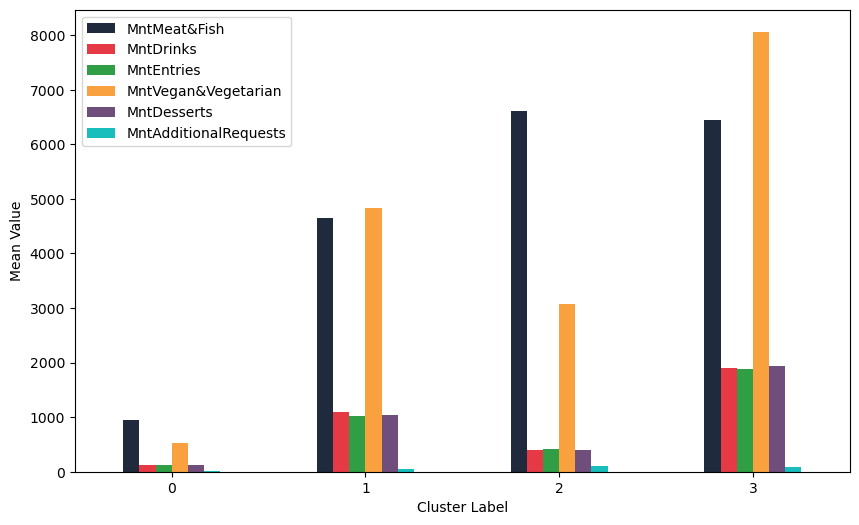

In [29]:
check_noveg_1 = food_set_noveg_labeled.groupby(['cluster']).mean()
check_noveg_1

ax_noveg_1 = check_noveg_1.plot.bar(figsize=(10,6), rot=0, color = colors)
ax_noveg_1.set_xlabel('Cluster Label')
ax_noveg_1.set_ylabel('Mean Value')
plt.show()

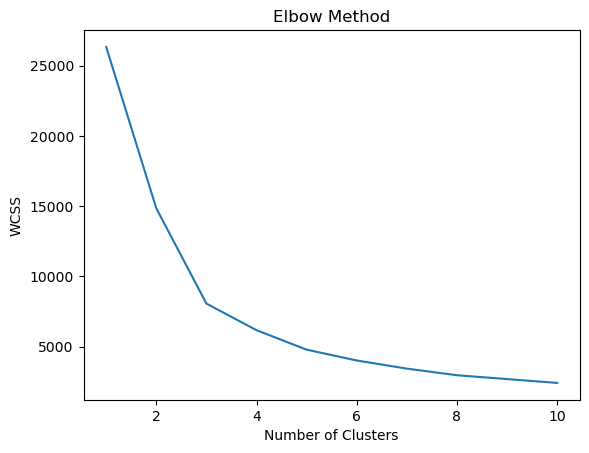

C:\Users\gonca\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


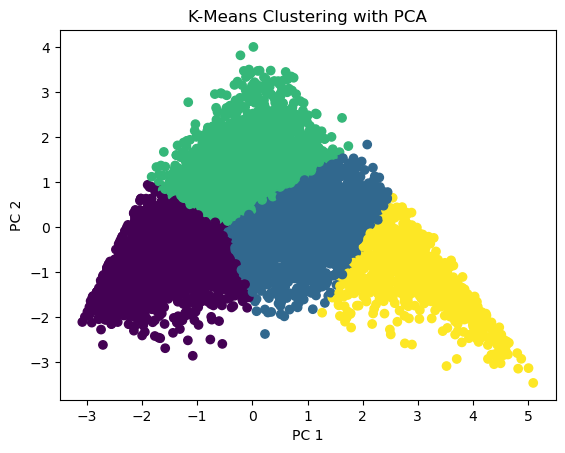

Score
Silhouette Score            0.4065
Calinski-Harabasz Index  7564.0464
WCSS                     6164.7433
Davies-Bouldin Index        0.8618

In [30]:

foods_scaled_6 = scaler.fit_transform(food_perc_noveg)

pca = PCA(n_components=2)
foods_pca = pca.fit_transform(foods_scaled_6)
foods_pca_test_4 = foods_pca
# Step 2: Determine the optimal number of clusters using the elbow method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(foods_pca)
    wcss.append(kmeans.inertia_)

# Plot the elbow curve
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

# Step 3: Apply K-Means clustering with the optimal number of clusters (e.g. 3)
kmeans = KMeans(n_clusters=4, init='k-means++', max_iter=3000, random_state=0)
kmeans.fit(foods_pca)

# Step 4: Plot the results
plt.scatter(foods_pca[:,0], foods_pca[:,1], c=kmeans.labels_, cmap='viridis')
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.title('K-Means Clustering with PCA')
plt.show()

cluster_scores(foods_pca_test_4 ,kmeans.labels_,kmeans)

Perfect its looking a lot better

In [31]:
food_perc_noveg_labeled = food_perc_noveg.copy()
food_perc_noveg_labeled['cluster'] = kmeans.labels_

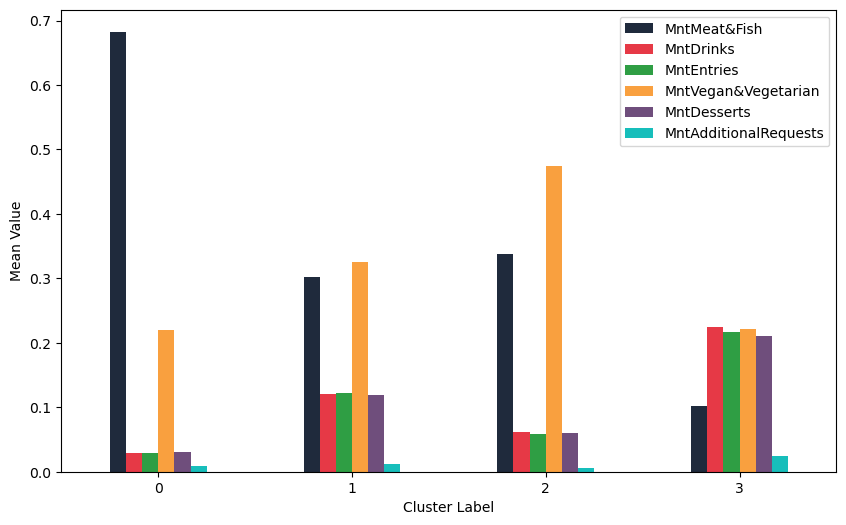

In [32]:
check_noveg_2 = food_perc_noveg_labeled.groupby(['cluster']).mean()
check_noveg_2

ax_noveg_2 = check_noveg_2.plot.bar(figsize=(10,6), rot=0, color = colors)
ax_noveg_2.set_xlabel('Cluster Label')
ax_noveg_2.set_ylabel('Mean Value')
plt.show()

**PCA ones:**

- Cluster 0: Very High Meat&Fish, Medium Vegan, Low everything else
- Cluster 1: Medium Fish and Vegan, Medium/low everything else
- Cluster 2: Higher Vegan, Medium/High Meat and Fish, Low everything else
- Cluster 4: Medium everything except additional requests

So basically we have
Cluster 0 : High Meat&Fish, Medium Vegan, Low everything else
Cluster 1: Medium Fish and Vegan, medium everything else
Cluster 2: Higher Vegan, High Meat and Fish, low everything else
Cluster 4: Medium everything except additional requests

### Without PCA

In [33]:
foods

MntMeat&Fish  MntDrinks  MntEntries  MntVegan&Vegetarian  MntDesserts  \
0           5180.0     2800.0        1400               9240.0        840.0   
1           8450.0     1220.0         300               8760.0        600.0   
2            140.0        0.0         160                150.0        200.0   
3           5320.0     1060.0        1760               2520.0        880.0   
4           6710.0      900.0        1120               4770.0        900.0   
...            ...        ...         ...                  ...          ...   
7003        6090.0      520.0         880               2820.0        700.0   
7004        4140.0      200.0        2220               5445.0       2220.0   
7005       10170.0     1660.0         660               6255.0       2000.0   
7006        6750.0     3220.0           0               6390.0        410.0   
7007        6480.0     2160.0         432               5460.0        260.0   

      MntAdditionalRequests  
0                      28.0  
1                      30.0  
2                      27.0  
3                     133.0  
4                     216.0  
...                     ...  
7003                   34.0  
7004                   43.0  
7005                   16.0  
7006                   58.0  
7007                  108.0  

[7000 rows x 6 columns]

C:\Users\gonca\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


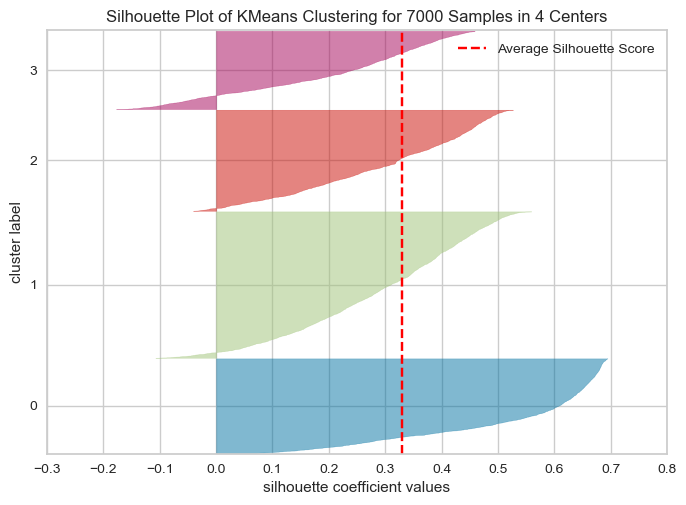

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 7000 Samples in 4 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [34]:
from yellowbrick.cluster import SilhouetteVisualizer

X = foods_perc.copy()

# Specify the features to use for clustering
features = ['MntMeat&Fish',	'MntDrinks','MntEntries','MntVegan&Vegetarian',	'MntDesserts', 'MntAdditionalRequests']


# Instantiate the clustering model and visualizer
model = KMeans(4, init='k-means++', random_state= 50)
visualizer = SilhouetteVisualizer(model, colors='yellowbrick')

visualizer.fit(X)        # Fit the data to the visualizer
visualizer.show()

## Looking Pretty good

###### KMEANS 3 - with Vegan Outliers

C:\Users\gonca\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Score
Silhouette Score            0.3694
Calinski-Harabasz Index  5479.2863
WCSS                      277.1417
Davies-Bouldin Index        1.0904

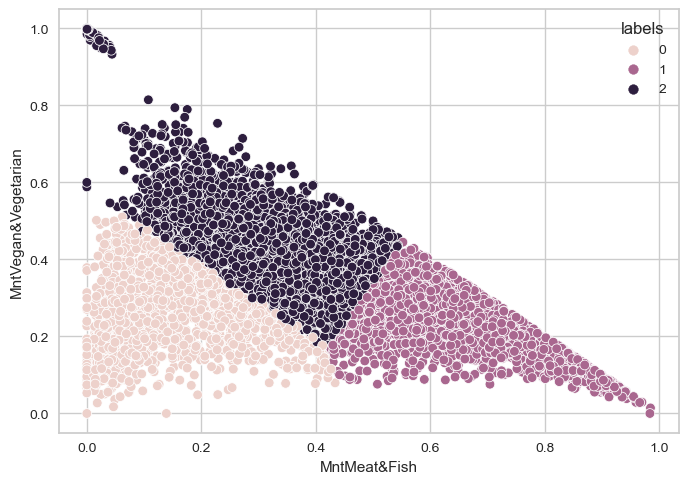

In [35]:
from sklearn.cluster import KMeans
food_model_perc_k3 = foods_perc.copy()
model_perc_k3 = KMeans(n_clusters = 3, random_state = 100).fit(foods_perc)
food_model_perc_k3['labels']= model_perc_k3.labels_

##centroids = model_k3_2.cluster_centers_
sns.scatterplot(data= food_model_perc_k3, x='MntMeat&Fish', y='MntVegan&Vegetarian', hue='labels')

cluster_scores(foods_perc,model_perc_k3.labels_,model_perc_k3)

In [36]:
fmpk3 = food_model_perc_k3.groupby(['labels']).mean()
fmpk3

MntMeat&Fish  MntDrinks  MntEntries  MntVegan&Vegetarian  MntDesserts  \
labels                                                                          
0           0.147349   0.196141    0.196595             0.258043     0.185056   
1           0.666807   0.033712    0.033190             0.223150     0.034362   
2           0.323860   0.074416    0.072604             0.445228     0.075106   

        MntAdditionalRequests  
labels                         
0                    0.017671  
1                    0.008990  
2                    0.009175

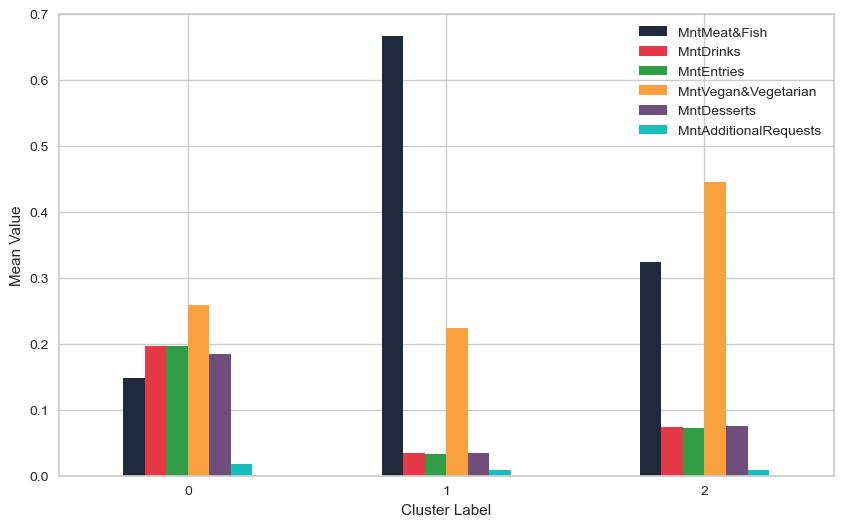

In [37]:
colors =  ['#1F2A3C', '#E63946', '#2F9E44', '#F9A03F', '#6F4E7C', '#17BEBB']
ax_k3 = fmpk3.plot.bar(figsize=(10,6), rot=0, color=colors)

ax_k3.set_xlabel('Cluster Label')
ax_k3.set_ylabel('Mean Value')
plt.show()

**Now:**

- Cluster 0:  Everything Medium, except additional requests
- Cluster 1: Very High Meat, Medium Vegan, Low rest
- Cluster 2: Higher Vegan, Medium Vegan, Low rest

###### KMEANS 4 - with Vegan Outliers

C:\Users\gonca\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Score
Silhouette Score            0.3303
Calinski-Harabasz Index  5294.3305
WCSS                      217.4713
Davies-Bouldin Index        1.0207

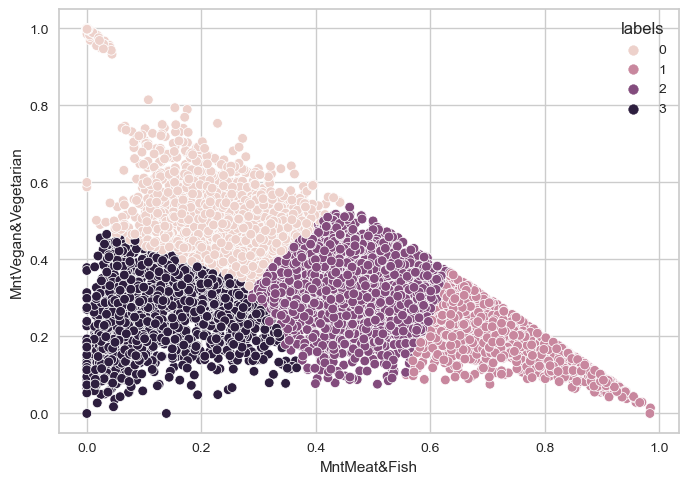

In [38]:
from sklearn.cluster import KMeans
food_model_perc_k4 = foods_perc.copy()
model_perc_k4 = KMeans(n_clusters = 4, random_state = 100).fit(foods_perc)
food_model_perc_k4['labels']= model_perc_k4.labels_

##centroids = model_k3_2.cluster_centers_
sns.scatterplot(data= food_model_perc_k4, x='MntMeat&Fish', y='MntVegan&Vegetarian', hue='labels')

cluster_scores(foods_perc,model_perc_k4.labels_,model_perc_k4)

In [39]:
fmpk4 = food_model_perc_k4.groupby(['labels']).mean()
fmpk4

MntMeat&Fish  MntDrinks  MntEntries  MntVegan&Vegetarian  MntDesserts  \
labels                                                                          
0           0.238657   0.079653    0.078415             0.516004     0.078066   
1           0.740537   0.020427    0.020984             0.187331     0.022124   
2           0.462951   0.067472    0.065542             0.326848     0.068346   
3           0.138133   0.200746    0.200516             0.253610     0.189848   

        MntAdditionalRequests  
labels                         
0                    0.009417  
1                    0.008817  
2                    0.009259  
3                    0.018083

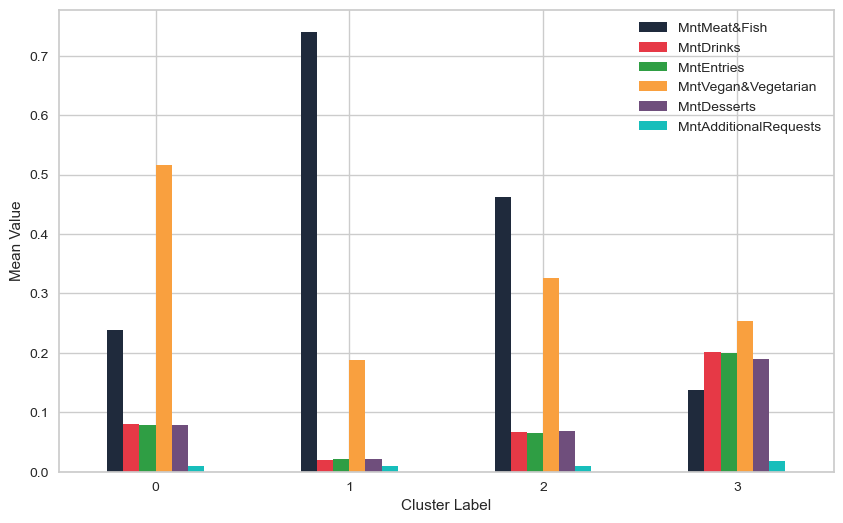

In [40]:
colors =  ['#1F2A3C', '#E63946', '#2F9E44', '#F9A03F', '#6F4E7C', '#17BEBB']
ax_k4 = fmpk4.plot.bar(figsize=(10,6), rot=0, color=colors)

ax_k4.set_xlabel('Cluster Label')
ax_k4.set_ylabel('Mean Value')
plt.show()

**PCA ones:**

- Cluster 0: Very High Meat&Fish, Medium Vegan, Low everything else
- Cluster 1: Medium Fish and Vegan, Medium everything else
- Cluster 2: Higher Vegan, High Meat and Fish, Low everything else
- Cluster 4: Medium everything except additional requests

**Now:**

- Cluster 0: Higher Vegan, Medium Meat, Low rest
- Cluster 1: Very High Meat, Medium Vegan, Low rest
- Cluster 2: High Meat, High Vegan, Low rest
- Cluster 3: Everything Medium, except additional requests

###### KMEANS 3 - without Vegan Outliers

C:\Users\gonca\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Score
Silhouette Score            0.3730
Calinski-Harabasz Index  5823.9806
WCSS                      250.8664
Davies-Bouldin Index        1.0771

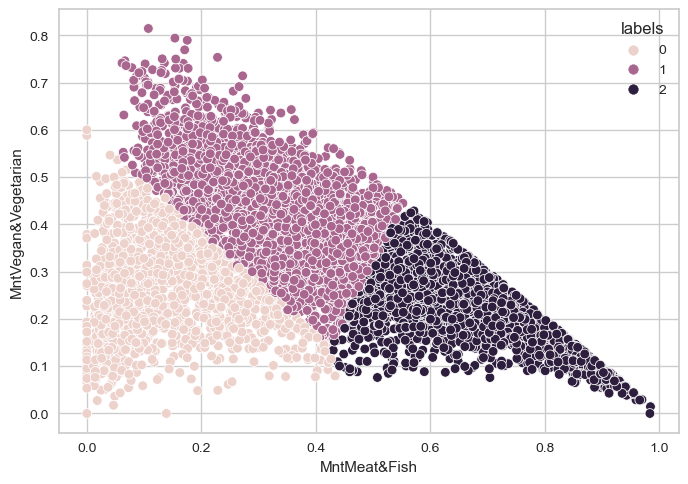

In [41]:
from sklearn.cluster import KMeans
food_model_perc_noveg_k3 = food_perc_noveg.copy()
model_perc__noveg_k3 = KMeans(n_clusters = 3, random_state = 100).fit(food_model_perc_noveg_k3)
food_model_perc_noveg_k3['labels']= model_perc__noveg_k3.labels_

##centroids = model_k3_2.cluster_centers_
sns.scatterplot(data= food_model_perc_noveg_k3, x='MntMeat&Fish', y='MntVegan&Vegetarian', hue='labels')

cluster_scores(food_perc_noveg,model_perc__noveg_k3.labels_,model_perc__noveg_k3)

In [42]:
fmpnvk3 = food_model_perc_noveg_k3.groupby(['labels']).mean()
fmpnvk3

MntMeat&Fish  MntDrinks  MntEntries  MntVegan&Vegetarian  MntDesserts  \
labels                                                                          
0           0.142459   0.197346    0.196890             0.259910     0.186546   
1           0.335019   0.076454    0.074778             0.428126     0.076633   
2           0.672620   0.032219    0.032069             0.221037     0.033253   

        MntAdditionalRequests  
labels                         
0                    0.017717  
1                    0.009375  
2                    0.009019

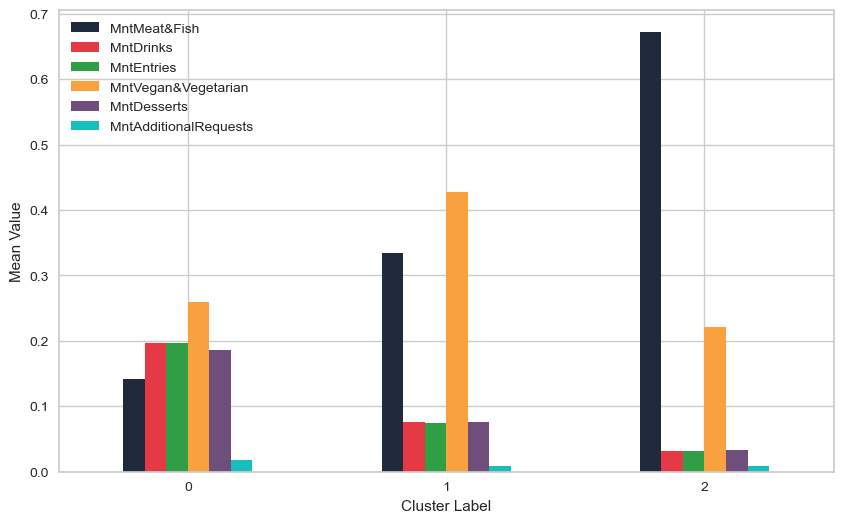

In [43]:
colors =  ['#1F2A3C', '#E63946', '#2F9E44', '#F9A03F', '#6F4E7C', '#17BEBB']
ax_nv_k3 = fmpnvk3.plot.bar(figsize=(10,6), rot=0, color=colors)

ax_nv_k3.set_xlabel('Cluster Label')
ax_nv_k3.set_ylabel('Mean Value')
plt.show()

###### KMEANS 4 - without Vegan Outliers

C:\Users\gonca\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Score
Silhouette Score            0.3281
Calinski-Harabasz Index  5534.7241
WCSS                      198.0235
Davies-Bouldin Index        1.0357

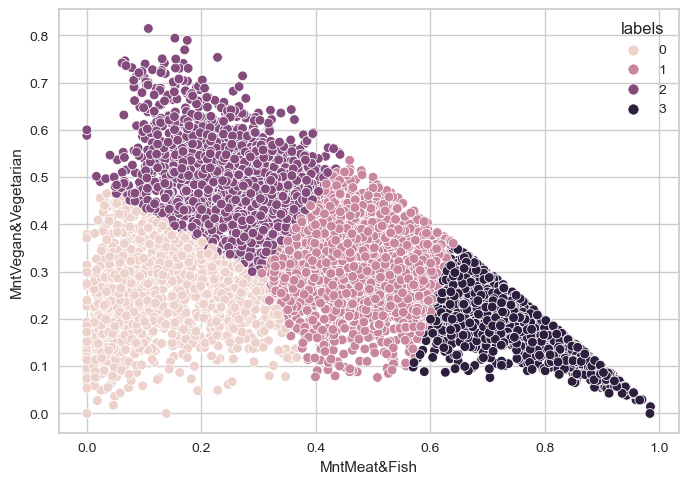

In [44]:
from sklearn.cluster import KMeans
food_model_perc_noveg_k4 = food_perc_noveg.copy()
model_perc__noveg_k4 = KMeans(n_clusters = 4, random_state = 100).fit(food_model_perc_noveg_k4)
food_model_perc_noveg_k4['labels']= model_perc__noveg_k4.labels_


##centroids = model_k3_2.cluster_centers_
sns.scatterplot(data= food_model_perc_noveg_k4, x='MntMeat&Fish', y='MntVegan&Vegetarian', hue='labels')
cluster_scores(food_perc_noveg,model_perc__noveg_k4.labels_,model_perc__noveg_k4)

In [45]:
fmpnvk4 = food_model_perc_noveg_k4.groupby(['labels']).mean()
fmpnvk4

MntMeat&Fish  MntDrinks  MntEntries  MntVegan&Vegetarian  MntDesserts  \
labels                                                                          
0           0.135346   0.203392    0.202453             0.248518     0.193074   
1           0.475869   0.066036    0.064092             0.319874     0.065428   
2           0.255739   0.083825    0.083263             0.483824     0.083600   
3           0.746355   0.019368    0.019720             0.184745     0.021122   

        MntAdditionalRequests  
labels                         
0                    0.018192  
1                    0.009140  
2                    0.009942  
3                    0.008919

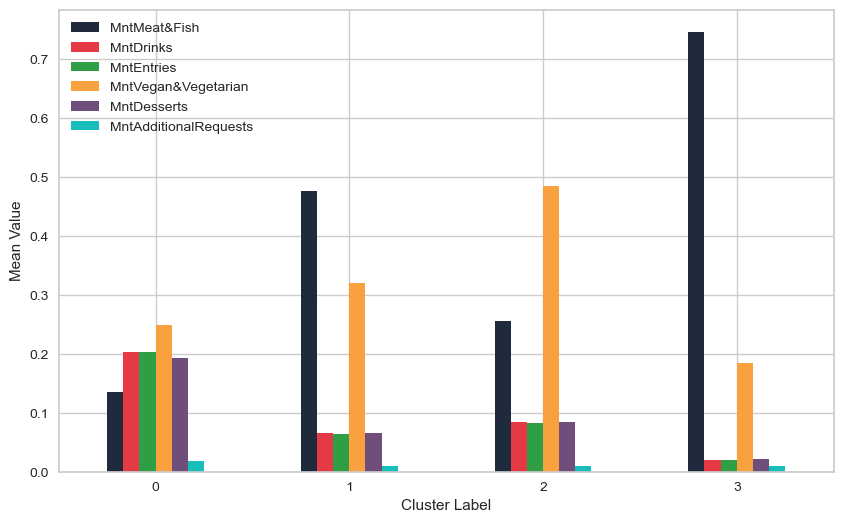

In [46]:
colors =  ['#1F2A3C', '#E63946', '#2F9E44', '#F9A03F', '#6F4E7C', '#17BEBB']
ax_nv_k4 = fmpnvk4.plot.bar(figsize=(10,6), rot=0, color=colors)

ax_nv_k4.set_xlabel('Cluster Label')
ax_nv_k4.set_ylabel('Mean Value')
plt.show()

###### KMEANS ++  5 - without Vegan Outliers 

C:\Users\gonca\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Score
Silhouette Score            0.3013
Calinski-Harabasz Index  4886.5845
WCSS                      176.0030
Davies-Bouldin Index        1.1546

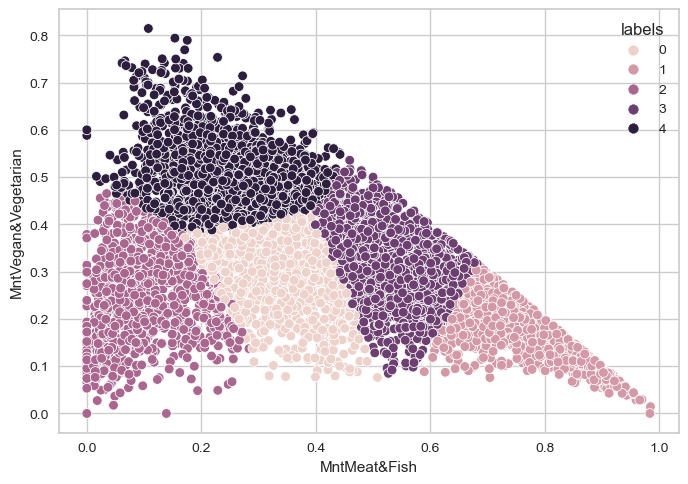

In [47]:
from sklearn.cluster import KMeans
food_model_perc_noveg_k5_ = food_perc_noveg.copy()
model_perc_noveg_k5_ = KMeans(n_clusters = 5, init='k-means++', random_state = 100).fit(food_model_perc_noveg_k5_)
food_model_perc_noveg_k5_['labels']= model_perc_noveg_k5_.labels_

sns.scatterplot(data= food_model_perc_noveg_k5_, x='MntMeat&Fish', y='MntVegan&Vegetarian', hue='labels')
cluster_scores(food_perc_noveg,model_perc_noveg_k5_.labels_,model_perc_noveg_k5_)

In [48]:
fmpik5 = food_model_perc_noveg_k5_.groupby(['labels']).mean()
fmpik5

MntMeat&Fish  MntDrinks  MntEntries  MntVegan&Vegetarian  MntDesserts  \
labels                                                                          
0           0.341393   0.113879    0.116167             0.303922     0.115383   
1           0.767389   0.017393    0.018128             0.169789     0.018575   
2           0.102682   0.217954    0.211536             0.246430     0.202627   
3           0.531396   0.045971    0.044646             0.322562     0.046525   
4           0.250421   0.077821    0.077049             0.508040     0.077118   

        MntAdditionalRequests  
labels                         
0                    0.010060  
1                    0.008808  
2                    0.019680  
3                    0.009192  
4                    0.009783

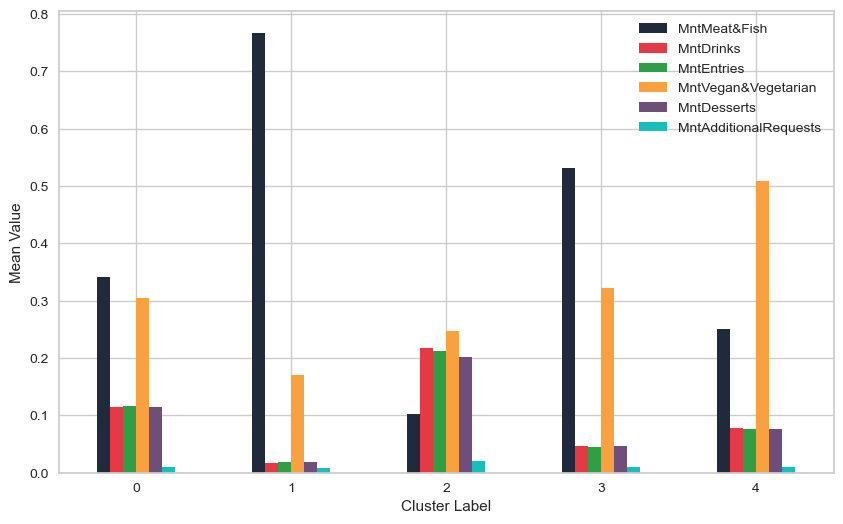

In [49]:
colors =  ['#1F2A3C', '#E63946', '#2F9E44', '#F9A03F', '#6F4E7C', '#17BEBB']
ax_nv_k5_ = fmpik5.plot.bar(figsize=(10,6), rot=0, color=colors)

ax_nv_k5_.set_xlabel('Cluster Label')
ax_nv_k5_.set_ylabel('Mean Value')
plt.show()

###### KMEANS ++  4 - without Vegan Outliers 

C:\Users\gonca\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Score
Silhouette Score            0.3284
Calinski-Harabasz Index  5534.5735
WCSS                      198.0280
Davies-Bouldin Index        1.0384

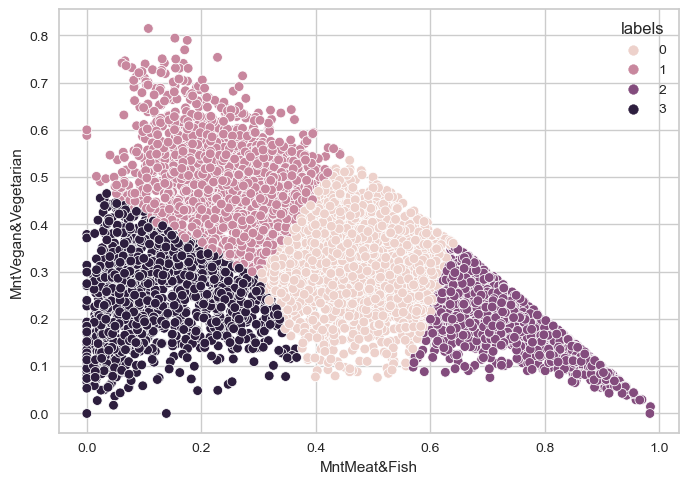

In [50]:
from sklearn.cluster import KMeans
food_model_perc_noveg_k4_ = food_perc_noveg.copy()
model_perc_noveg_k4_ = KMeans(n_clusters = 4, init='k-means++', max_iter = 100000).fit(food_model_perc_noveg_k4_)
food_model_perc_noveg_k4_['labels']= model_perc_noveg_k4_.labels_

sns.scatterplot(data= food_model_perc_noveg_k4_, x='MntMeat&Fish', y='MntVegan&Vegetarian', hue='labels')
cluster_scores(food_perc_noveg,model_perc_noveg_k4_.labels_,model_perc_noveg_k4_)

In [51]:
fmpik4 = food_model_perc_noveg_k4_.groupby(['labels']).mean()
fmpik4

MntMeat&Fish  MntDrinks  MntEntries  MntVegan&Vegetarian  MntDesserts  \
labels                                                                          
0           0.474573   0.066041    0.064126             0.320692     0.065871   
1           0.253752   0.084305    0.085245             0.481583     0.085271   
2           0.745374   0.019511    0.019946             0.185234     0.021247   
3           0.132704   0.207180    0.203723             0.245225     0.193825   

        MntAdditionalRequests  
labels                         
0                    0.009136  
1                    0.010036  
2                    0.008915  
3                    0.018352

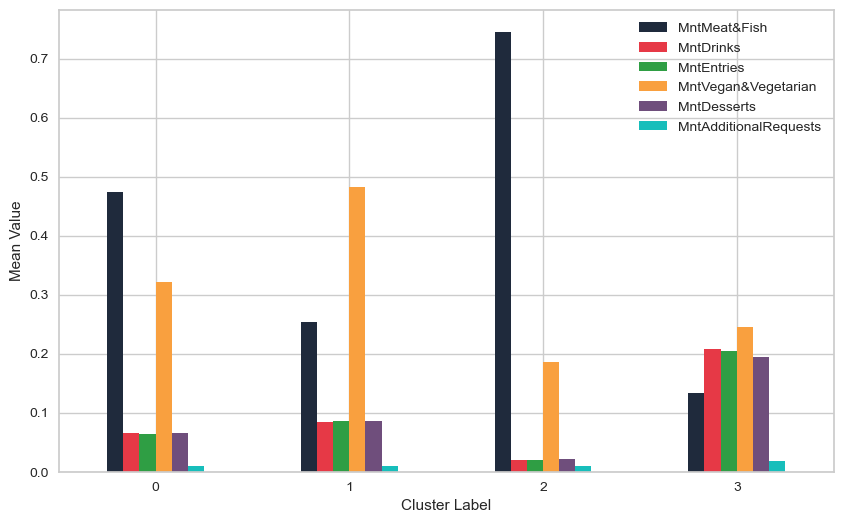

In [52]:
colors =  ['#1F2A3C', '#E63946', '#2F9E44', '#F9A03F', '#6F4E7C', '#17BEBB']
ax_nv_k4_ = fmpik4.plot.bar(figsize=(10,6), rot=0, color=colors)

ax_nv_k4_.set_xlabel('Cluster Label')
ax_nv_k4_.set_ylabel('Mean Value')
plt.show()

###### KMEANS ++  3 - without Vegan Outliers 

C:\Users\gonca\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Score
Silhouette Score            0.3727
Calinski-Harabasz Index  5824.0022
WCSS                      250.8656
Davies-Bouldin Index        1.0773

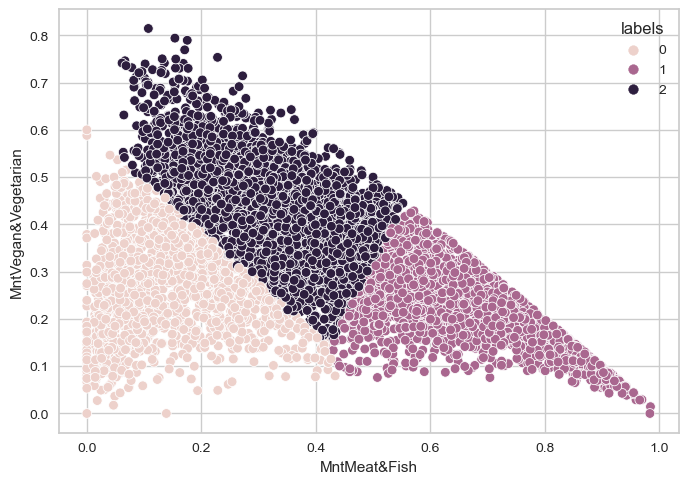

In [53]:
from sklearn.cluster import KMeans
food_model_perc_noveg_k3_ = food_perc_noveg.copy()
model_perc_noveg_k3_ = KMeans(n_clusters = 3, init='k-means++').fit(food_model_perc_noveg_k3_)
food_model_perc_noveg_k3_['labels']= model_perc_noveg_k3_.labels_

sns.scatterplot(data= food_model_perc_noveg_k3_, x='MntMeat&Fish', y='MntVegan&Vegetarian', hue='labels')
cluster_scores(food_perc_noveg,model_perc_noveg_k3_.labels_,model_perc_noveg_k3_)


In [54]:
food_model_perc_noveg_k4_['labels'].value_counts()

0    2328
1    1879
2    1523
3    1207
Name: labels, dtype: int64

<AxesSubplot:xlabel='MntMeat&Fish', ylabel='MntDesserts'>

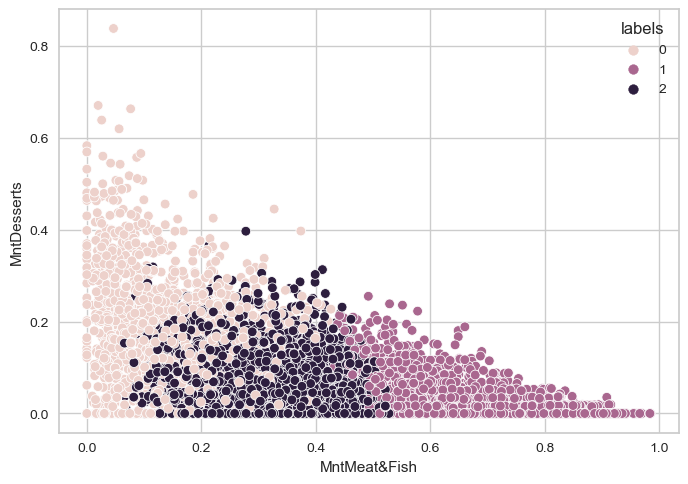

In [55]:
sns.scatterplot(data= food_model_perc_noveg_k3_, x='MntMeat&Fish', y='MntDesserts', hue='labels')

In [56]:
fmpik3 = food_model_perc_noveg_k3_.groupby(['labels']).mean()
fmpik3

MntMeat&Fish  MntDrinks  MntEntries  MntVegan&Vegetarian  MntDesserts  \
labels                                                                          
0           0.142751   0.196999    0.196752             0.260406     0.186275   
1           0.672349   0.032384    0.032144             0.221016     0.033304   
2           0.335146   0.076291    0.074586             0.428444     0.076545   

        MntAdditionalRequests  
labels                         
0                    0.017683  
1                    0.009021  
2                    0.009373

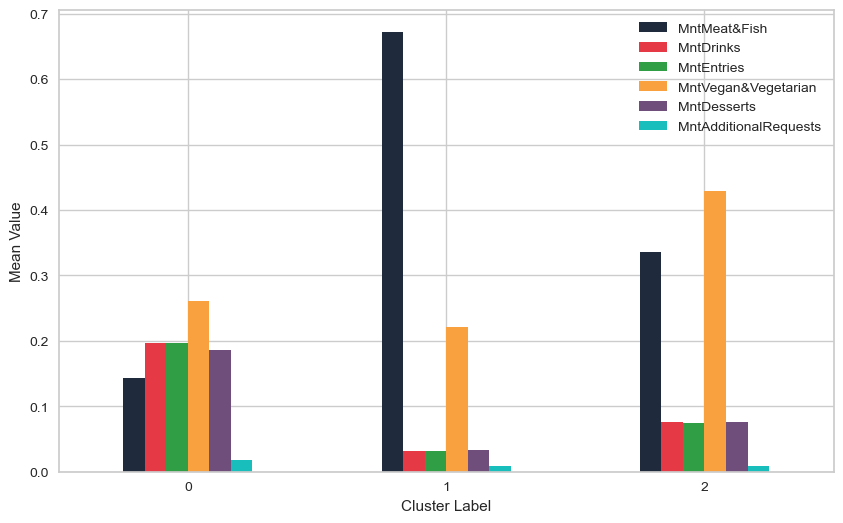

In [57]:
colors =  ['#1F2A3C', '#E63946', '#2F9E44', '#F9A03F', '#6F4E7C', '#17BEBB']
ax_nv_k3_ = fmpik3.plot.bar(figsize=(10,6), rot=0, color=colors)

ax_nv_k3_.set_xlabel('Cluster Label')
ax_nv_k3_.set_ylabel('Mean Value')
plt.show()

## Min-Max Scaling

In [58]:
foods_norm = ((food_set - food_set.min())/ food_set.max() - food_set.min())
foods_norm

MntMeat&Fish  MntDrinks  MntEntries  MntVegan&Vegetarian  MntDesserts  \
0         0.345794   0.703518    0.351759             0.355740     0.211055   
1         0.564085   0.306533    0.075377             0.337260     0.150754   
2         0.009346   0.000000    0.040201             0.005775     0.050251   
3         0.355140   0.266332    0.442211             0.097020     0.221106   
4         0.447931   0.226131    0.281407             0.183645     0.226131   
...            ...        ...         ...                  ...          ...   
7003      0.406542   0.130653    0.221106             0.108570     0.175879   
7004      0.276368   0.050251    0.557789             0.209633     0.557789   
7005      0.678905   0.417085    0.165829             0.240818     0.502513   
7006      0.450601   0.809045    0.000000             0.246015     0.103015   
7007      0.432577   0.542714    0.108543             0.210210     0.065327   

      MntAdditionalRequests  
0                  0.112450  
1                  0.120482  
2                  0.108434  
3                  0.534137  
4                  0.867470  
...                     ...  
7003               0.136546  
7004               0.172691  
7005               0.064257  
7006               0.232932  
7007               0.433735  

[7000 rows x 6 columns]

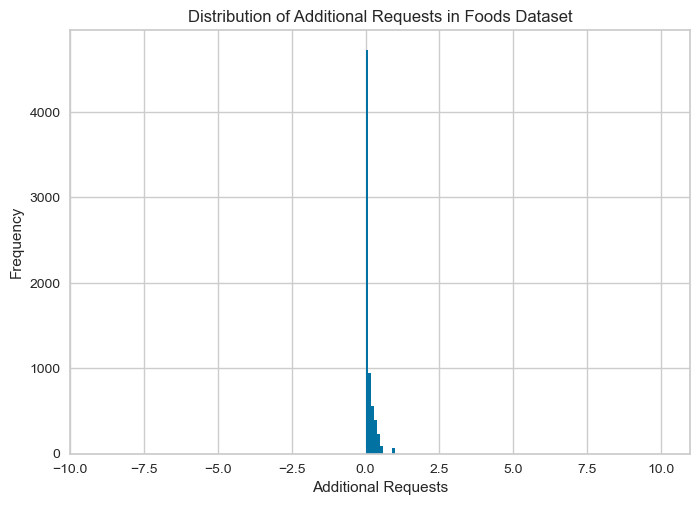

In [59]:
mnt_requests = foods_norm["MntVegan&Vegetarian"]
plt.hist(mnt_requests, bins=10)
# Add axis labels and a title
plt.xlabel("Additional Requests")
plt.ylabel("Frequency")
plt.title("Distribution of Additional Requests in Foods Dataset")
padding = 10  # Adjust padding as needed
plt.xlim(mnt_requests.min() - padding, mnt_requests.max() + padding)

# Show the histogram
plt.show()

###### KMEANS ++  3 - with Vegan Outliers 

C:\Users\gonca\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Score
Silhouette Score            0.4258
Calinski-Harabasz Index  3592.0732
WCSS                      807.6710
Davies-Bouldin Index        1.4849

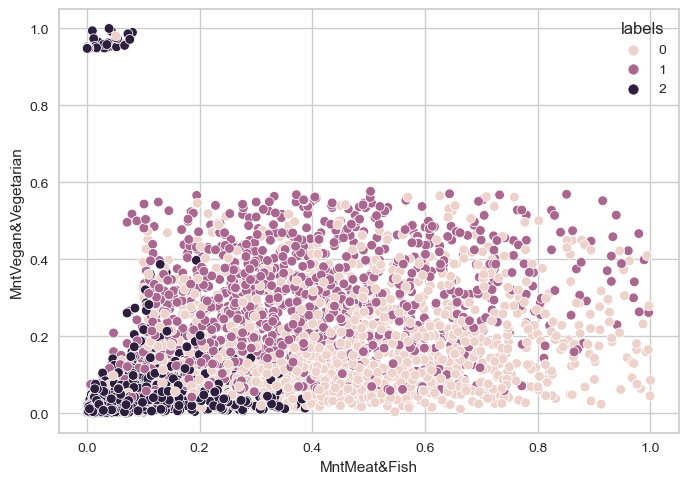

In [71]:
from sklearn.cluster import KMeans
food_norm_k3 = foods_norm.copy()
model_food_norm_k3 = KMeans(n_clusters = 3, init='k-means++', random_state = 100).fit(food_norm_k3)
food_norm_k3['labels']= model_food_norm_k3.labels_

sns.scatterplot(data= food_norm_k3, x='MntMeat&Fish', y='MntVegan&Vegetarian', hue='labels')
cluster_scores(foods_norm,model_food_norm_k3.labels_,model_food_norm_k3)

In [72]:
fmnk3 = food_norm_k3.groupby(['labels']).mean()
fmnk3

MntMeat&Fish  MntDrinks  MntEntries  MntVegan&Vegetarian  MntDesserts  \
labels                                                                          
0           0.435013   0.141736    0.142725             0.156365     0.137694   
1           0.359228   0.442719    0.426694             0.255438     0.440760   
2           0.057013   0.035398    0.035019             0.037636     0.035171   

        MntAdditionalRequests  
labels                         
0                    0.279168  
1                    0.330858  
2                    0.072164

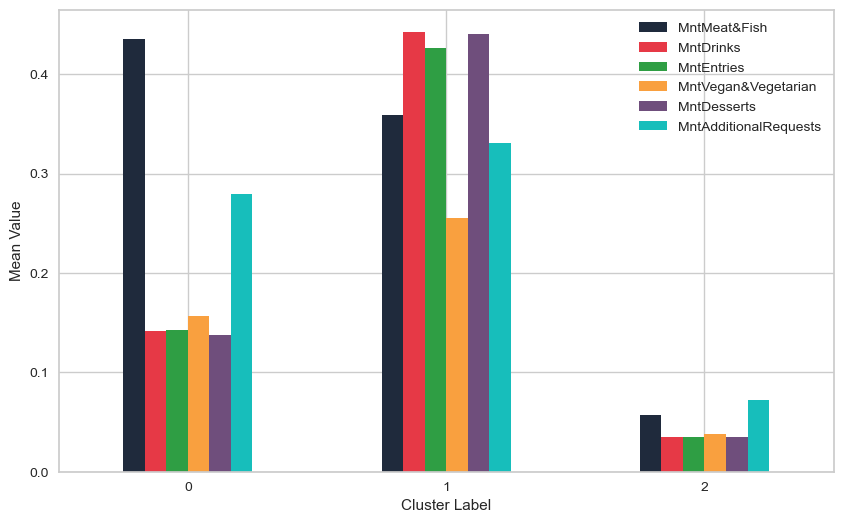

In [73]:
ax_n_k3 = fmnk3.plot.bar(figsize=(10,6), rot=0, color=colors)

ax_n_k3.set_xlabel('Cluster Label')
ax_n_k3.set_ylabel('Mean Value')
plt.show()

###### KMEANS ++  4 - with Vegan Outliers 

C:\Users\gonca\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Score
Silhouette Score            0.4424
Calinski-Harabasz Index  2977.8937
WCSS                      718.9135
Davies-Bouldin Index        1.3903

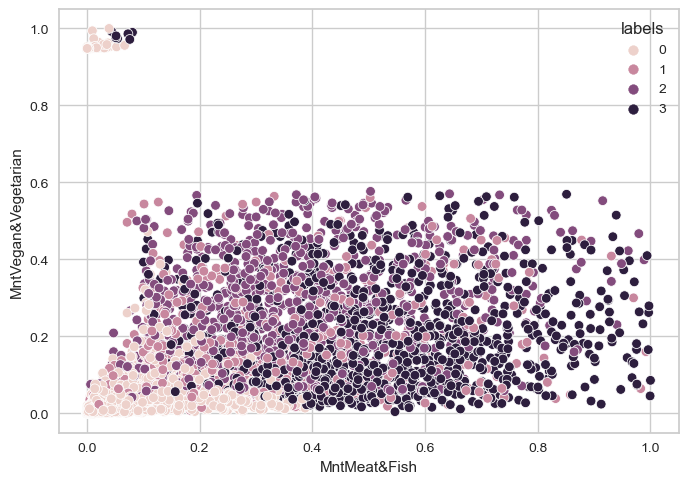

In [74]:
from sklearn.cluster import KMeans
food_norm_k4 = foods_norm.copy()
model_food_norm_k4 = KMeans(n_clusters = 4, init='k-means++', random_state = 100).fit(food_norm_k4)
food_norm_k4['labels']= model_food_norm_k4.labels_

sns.scatterplot(data= food_norm_k4, x='MntMeat&Fish', y='MntVegan&Vegetarian', hue='labels')
cluster_scores(foods_norm,model_food_norm_k4.labels_,model_food_norm_k4)

In [75]:
fmnk4 = food_norm_k4.groupby(['labels']).mean()
fmnk4

MntMeat&Fish  MntDrinks  MntEntries  MntVegan&Vegetarian  MntDesserts  \
labels                                                                          
0           0.059096   0.035358    0.035397             0.036494     0.035559   
1           0.298463   0.208940    0.187605             0.152907     0.189748   
2           0.356439   0.463067    0.464900             0.257226     0.480990   
3           0.493698   0.161423    0.155280             0.185532     0.149098   

        MntAdditionalRequests  
labels                         
0                    0.072970  
1                    0.598042  
2                    0.277244  
3                    0.161870

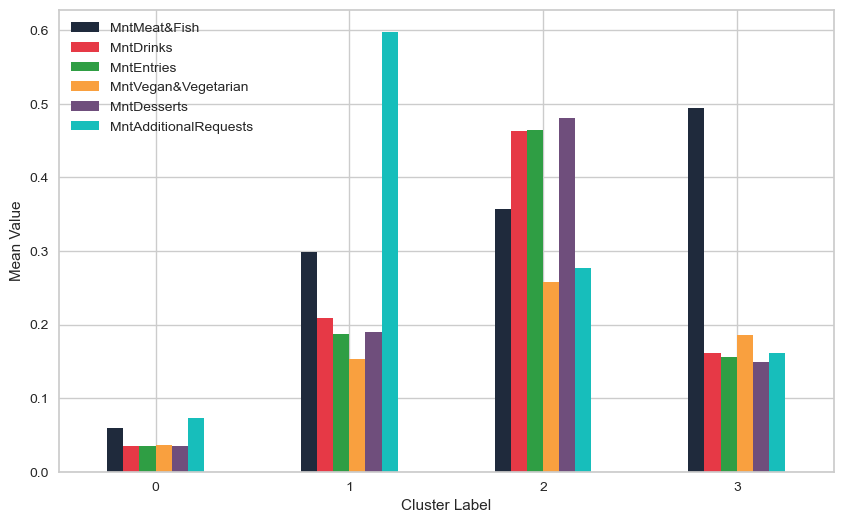

In [76]:
ax_n_k4 = fmnk4.plot.bar(figsize=(10,6), rot=0, color=colors)

ax_n_k4.set_xlabel('Cluster Label')
ax_n_k4.set_ylabel('Mean Value')
plt.show()

###### KMEANS ++  5- with Vegan Outliers 

C:\Users\gonca\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Score
Silhouette Score            0.4469
Calinski-Harabasz Index  2634.1199
WCSS                      653.1350
Davies-Bouldin Index        1.4998

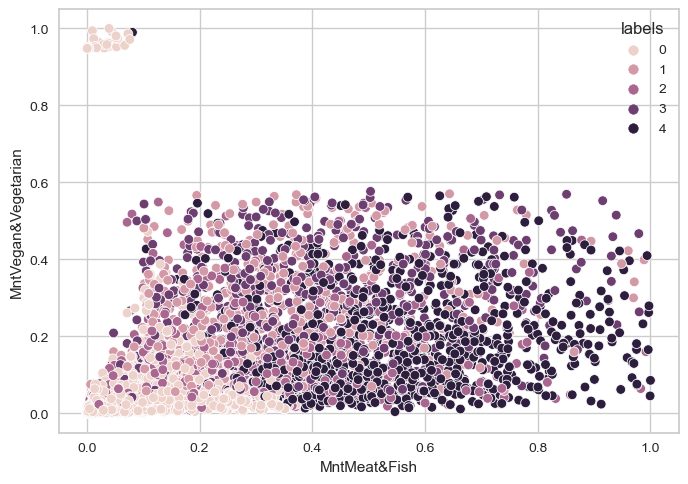

In [77]:
from sklearn.cluster import KMeans
food_norm_k5 = foods_norm.copy()
model_food_norm_k5 = KMeans(n_clusters = 5, init='k-means++', random_state = 100).fit(food_norm_k5)
food_norm_k5['labels']= model_food_norm_k5.labels_

sns.scatterplot(data= food_norm_k5, x='MntMeat&Fish', y='MntVegan&Vegetarian', hue='labels')
cluster_scores(foods_norm,model_food_norm_k5.labels_,model_food_norm_k5)

## Min-Max Scaling - without veg

In [78]:
foods_norm_nvg = ((food_set_noveg - food_set_noveg.min())/ food_set_noveg.max() - food_set_noveg.min())
foods_norm_nvg

MntMeat&Fish  MntDrinks  MntEntries  MntVegan&Vegetarian  MntDesserts  \
0         0.345794   0.703518    0.351759             0.616617     0.211055   
1         0.564085   0.306533    0.075377             0.584585     0.150754   
2         0.009346   0.000000    0.040201             0.010010     0.050251   
3         0.355140   0.266332    0.442211             0.168168     0.221106   
4         0.447931   0.226131    0.281407             0.318318     0.226131   
...            ...        ...         ...                  ...          ...   
7003      0.406542   0.130653    0.221106             0.188188     0.175879   
7004      0.276368   0.050251    0.557789             0.363363     0.557789   
7005      0.678905   0.417085    0.165829             0.417417     0.502513   
7006      0.450601   0.809045    0.000000             0.426426     0.103015   
7007      0.432577   0.542714    0.108543             0.364364     0.065327   

      MntAdditionalRequests  
0                  0.112450  
1                  0.120482  
2                  0.108434  
3                  0.534137  
4                  0.867470  
...                     ...  
7003               0.136546  
7004               0.172691  
7005               0.064257  
7006               0.232932  
7007               0.433735  

[6937 rows x 6 columns]

C:\Users\gonca\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Score
Silhouette Score            0.4477
Calinski-Harabasz Index  3177.9690
WCSS                      762.1399
Davies-Bouldin Index        1.4088

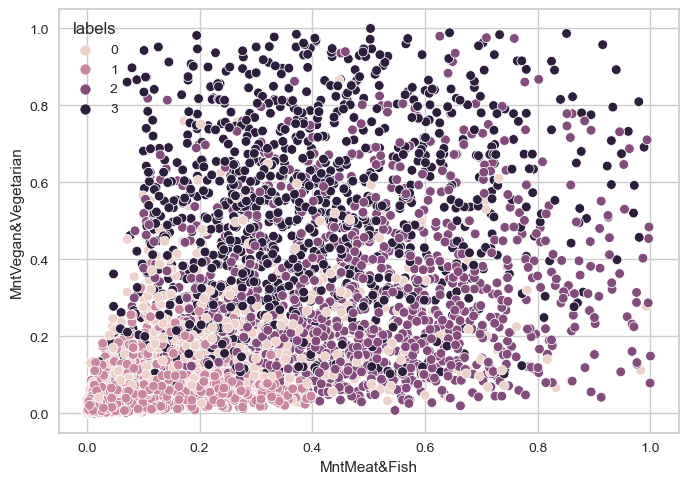

In [79]:
from sklearn.cluster import KMeans
foods_norm_nvg_k4 = foods_norm_nvg.copy()
model_foods_norm_nvg_k4 = KMeans(n_clusters = 4, init='k-means++', random_state = 100).fit(foods_norm_nvg_k4)
foods_norm_nvg_k4['labels']= model_foods_norm_nvg_k4.labels_

sns.scatterplot(data= foods_norm_nvg_k4, x='MntMeat&Fish', y='MntVegan&Vegetarian', hue='labels')
cluster_scores(foods_norm_nvg,model_foods_norm_nvg_k4.labels_,model_foods_norm_nvg_k4)

In [80]:
counts = foods_norm_nvg_k4['labels'].value_counts()
counts

1    3871
2    1192
3    1138
0     736
Name: labels, dtype: int64

# **Testing out other stuff**

### **AgglomerativeClustering**

### WITH VEGANS

In [90]:
from sklearn.cluster import AgglomerativeClustering
cluster_model = AgglomerativeClustering(n_clusters=4, linkage='ward')

# fit the model to your data
cluster_labels = cluster_model.fit_predict(food_set)

# the output of fit_predict is an array of cluster labels
# you can assign these labels back to your original dataframe
food_set_test2 = food_set.copy()
food_set_test2['cluster_labels'] = cluster_labels


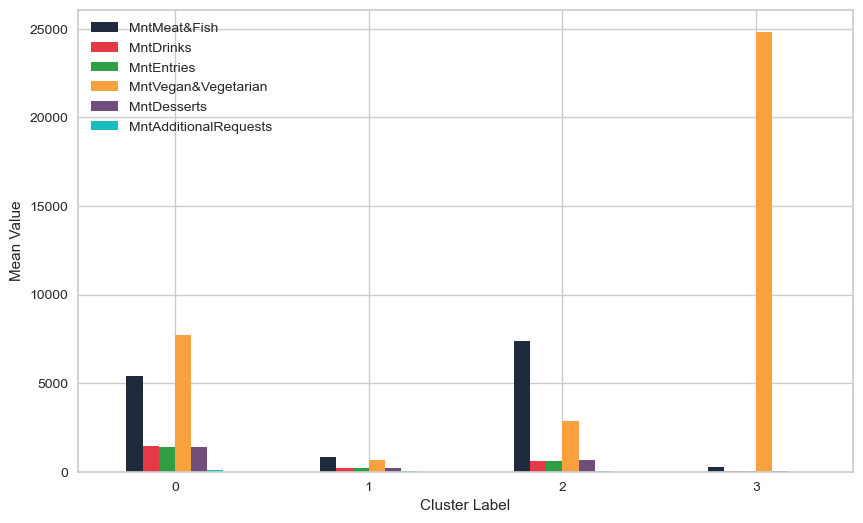

Score
Silhouette Score            0.5329
Calinski-Harabasz Index  6022.3966
WCSS                           N/A
Davies-Bouldin Index        0.9069

In [91]:
means_2 = food_set_test2.groupby('cluster_labels').mean()
means_2
aglo_2 = means_2.plot.bar(figsize=(10,6), rot=0, color=colors)

aglo_2.set_xlabel('Cluster Label')
aglo_2.set_ylabel('Mean Value')
plt.show()
cluster_scores(food_set,food_set_test2['cluster_labels'],cluster_model)

In [92]:
from sklearn.cluster import AgglomerativeClustering
cluster_model = AgglomerativeClustering(n_clusters=4, linkage='ward')

# fit the model to your data
cluster_labels = cluster_model.fit_predict(food_set_noveg)

# the output of fit_predict is an array of cluster labels
# you can assign these labels back to your original dataframe
food_set_noveg_test3 = food_set_noveg.copy()
food_set_noveg_test3['cluster_labels'] = cluster_labels

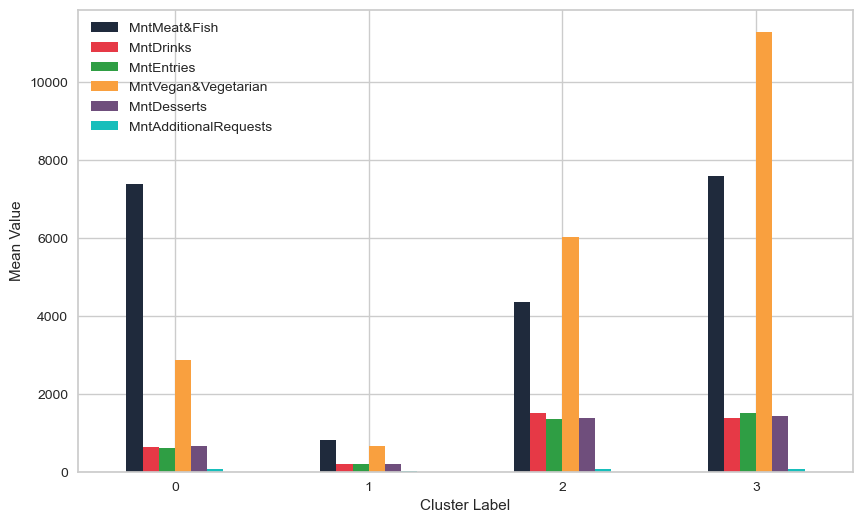

Score
Silhouette Score            0.5293
Calinski-Harabasz Index  6593.4740
WCSS                           N/A
Davies-Bouldin Index        1.1262

In [93]:
means_3 = food_set_noveg_test3.groupby('cluster_labels').mean()
means_3
aglo_3 = means_3.plot.bar(figsize=(10,6), rot=0, color=colors)

aglo_3.set_xlabel('Cluster Label')
aglo_3.set_ylabel('Mean Value')
plt.show()
cluster_scores(food_set_noveg,food_set_noveg_test3['cluster_labels'],cluster_model)

## Aglo  k  = 5

In [95]:
from sklearn.cluster import AgglomerativeClustering
cluster_model = AgglomerativeClustering(n_clusters=5, linkage='ward')

# fit the model to your data
cluster_labels = cluster_model.fit_predict(food_set)

# the output of fit_predict is an array of cluster labels
# you can assign these labels back to your original dataframe
food_set_test4 = food_set.copy()
food_set_test4['cluster_labels'] = cluster_labels

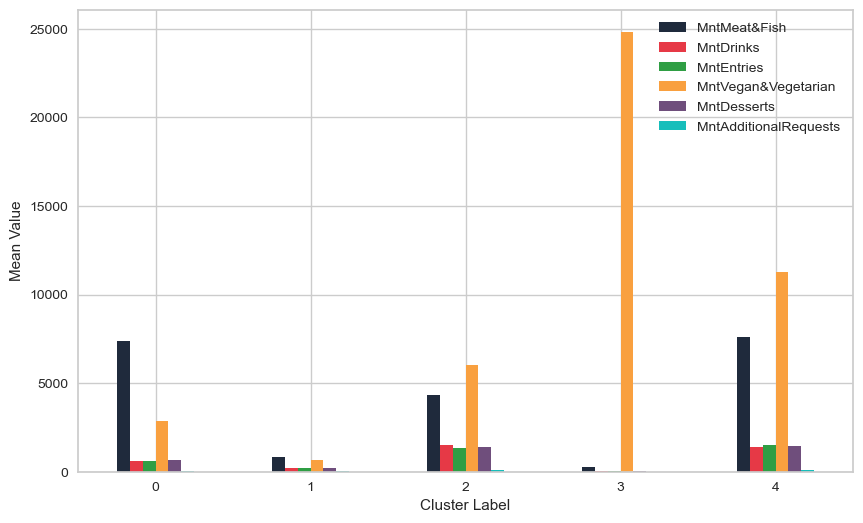

Score
Silhouette Score            0.5332
Calinski-Harabasz Index  6245.4736
WCSS                           N/A
Davies-Bouldin Index        0.9529

In [97]:
means_4 = food_set_test4.groupby('cluster_labels').mean()
means_4
aglo_4 = means_4.plot.bar(figsize=(10,6), rot=0, color=colors)

aglo_4.set_xlabel('Cluster Label')
aglo_4.set_ylabel('Mean Value')
plt.show()
cluster_scores(food_set,food_set_test4['cluster_labels'],cluster_model)

In [98]:
from sklearn.cluster import AgglomerativeClustering
cluster_model = AgglomerativeClustering(n_clusters=5, linkage='ward')

# fit the model to your data
cluster_labels = cluster_model.fit_predict(foods_norm)

# the output of fit_predict is an array of cluster labels
# you can assign these labels back to your original dataframe
foods_norm_test = foods_norm.copy()
foods_norm_test['cluster_labels'] = cluster_labels

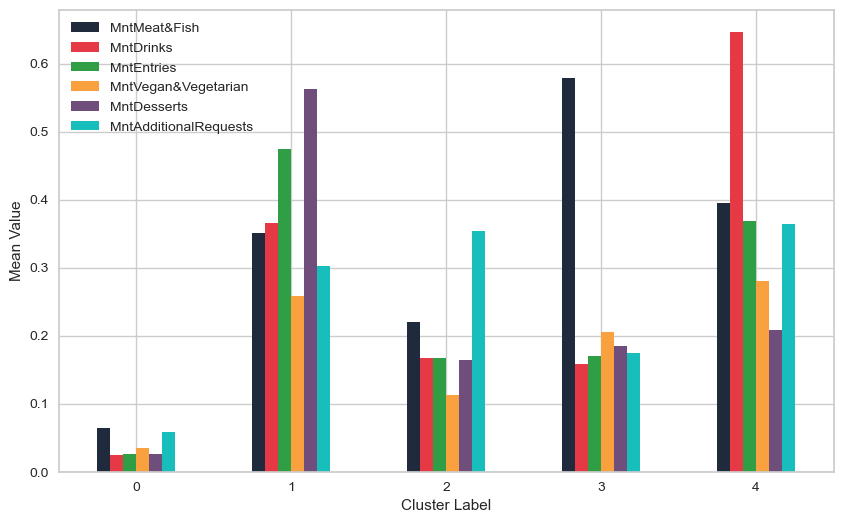

Score
Silhouette Score            0.3863
Calinski-Harabasz Index  2184.9877
WCSS                           N/A
Davies-Bouldin Index        1.7506

In [101]:
means_5 = foods_norm_test.groupby('cluster_labels').mean()
means_5
aglo_5 = means_5.plot.bar(figsize=(10,6), rot=0, color=colors)

aglo_5.set_xlabel('Cluster Label')
aglo_5.set_ylabel('Mean Value')
plt.show()
cluster_scores(foods_norm,foods_norm_test['cluster_labels'],cluster_model)

## Dendogram on our normalized data

In [ ]:
import scipy.cluster.hierarchy as sch
# create dendrogram
dendrogram = sch.dendrogram(sch.linkage(foods_norm, method='ward'))
# add labels to the dendrogram
plt.title("Dendrogram")
plt.xlabel("Customers")
plt.ylabel("Euclidean distances")
plt.show()

###### KMEANS NORMAL DATA

C:\Users\gonca\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


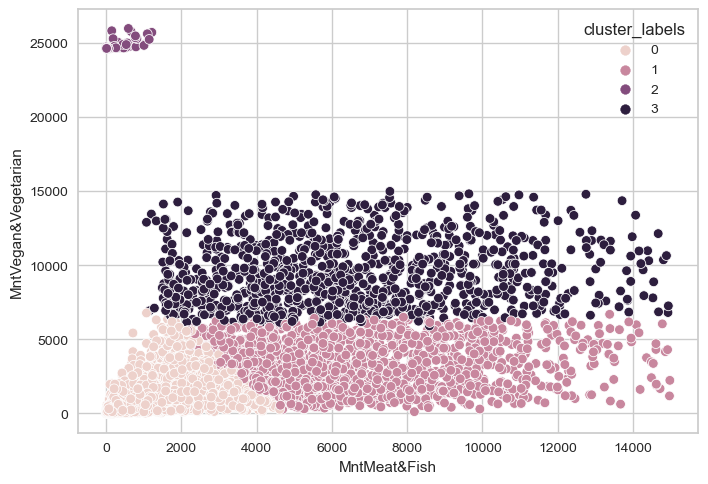

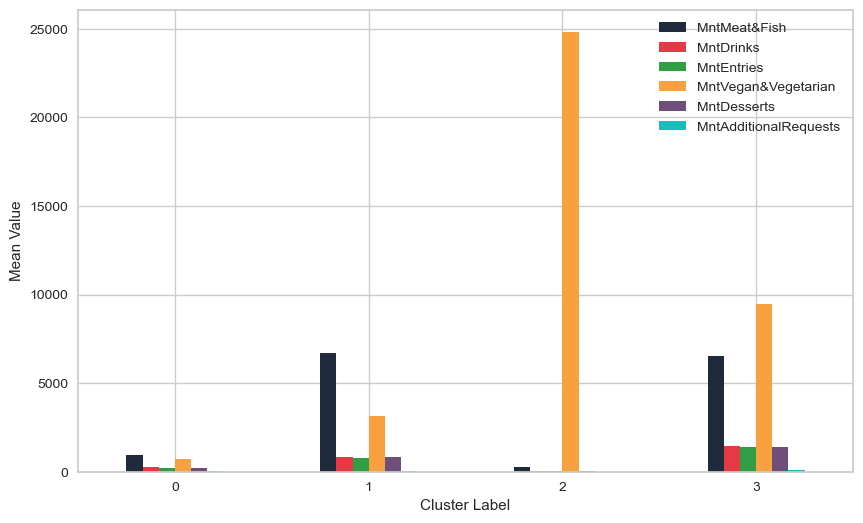

Score
Silhouette Score                   0.5511
Calinski-Harabasz Index         7324.2805
WCSS                     48264471308.4918
Davies-Bouldin Index               0.7950

In [103]:
from sklearn.cluster import KMeans
test232 = food_set.copy()
model_test232 = KMeans(n_clusters = 4, init='k-means++', random_state = 100).fit(test232)
test232['cluster_labels'] = model_test232.labels_

means_test232 = test232.groupby('cluster_labels').mean()
means_test232

sns.scatterplot(data= test232, x='MntMeat&Fish', y='MntVegan&Vegetarian', hue='cluster_labels')
cluster_scores(food_set,model_test232.labels_,model_test232)
aglo_test232 = means_test232.plot.bar(figsize=(10,6), rot=0, color=colors)

aglo_test232.set_xlabel('Cluster Label')
aglo_test232.set_ylabel('Mean Value')
plt.show()

cluster_scores(food_set,model_test232.labels_,model_test232)

In [104]:
counts = test232['cluster_labels'].value_counts()
counts

0    4292
1    1627
3    1018
2      63
Name: cluster_labels, dtype: int64

C:\Users\gonca\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


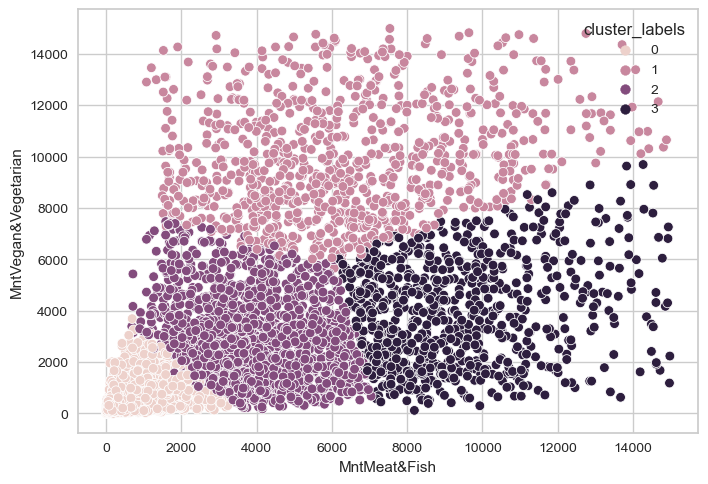

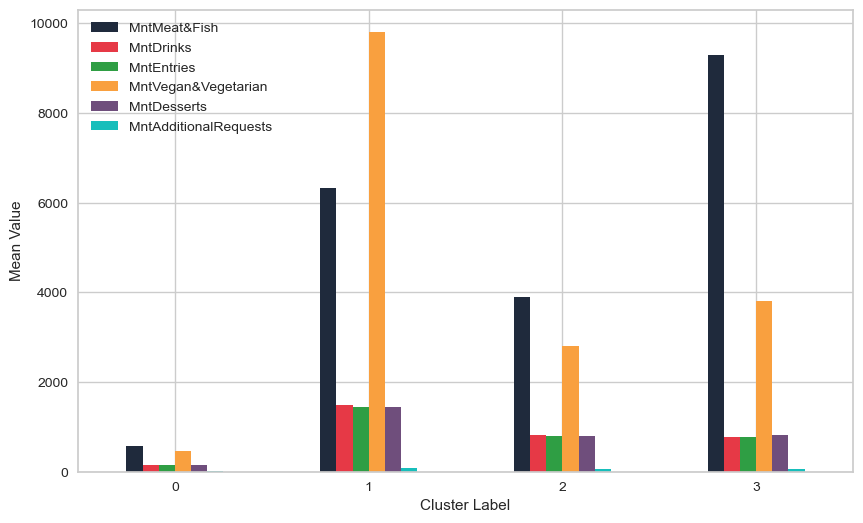

Score
Silhouette Score                   0.5114
Calinski-Harabasz Index         8302.8667
WCSS                     36664148939.6919
Davies-Bouldin Index               0.9293

In [105]:
from sklearn.cluster import KMeans
test233 = food_set_noveg.copy()
model_test233 = KMeans(n_clusters = 4, init='k-means++', random_state = 100).fit(test233)
test233['cluster_labels'] = model_test233.labels_

means_test233 = test233.groupby('cluster_labels').mean()
means_test233

sns.scatterplot(data= test233, x='MntMeat&Fish', y='MntVegan&Vegetarian', hue='cluster_labels')

aglo_test233 = means_test233.plot.bar(figsize=(10,6), rot=0, color=colors)

aglo_test233.set_xlabel('Cluster Label')
aglo_test233.set_ylabel('Mean Value')
plt.show()

cluster_scores(food_set_noveg,model_test233.labels_,model_test233)

In [ ]:
wE